In [0]:
#Step1: 

#Option A:
#mouting local drive and importing dataset from local drive 

import os

try:

# Change the current working Directory    
  os.chdir("C:/Users/Agastya Bhavana/Downloads") #specify location of your CoStar expoerted data here 
  print("Directory changed successfully ! ")
  a = !pwd
  print("You are now working the directory: \n" + str(a))
  
except OSError:
  print("Can't change the Current Working Directory, Please check the directory again!")
  a = !pwd
  print("You are currently working the forlder: \n" + str(a))

df = pd.read_csv("Input_Data.csv") # specify the name of the file here, such as "name_of_expoerted_CoStarData.csv"




In [0]:
#Option B:
#mounting the Google drive: enter authorization code provided by google in the link below and press enter 

from google.colab import drive
drive.mount('/content/drive')

In [0]:
#Option B continued:
# load dataset from google drive 
import pandas as pd
df = pd.read_csv('/content/drive/Shared drives/Capstone Group #4/CostarDataForClustering.csv')

#df = pd.read_csv('/content/drive/My Drive/...') #load data from google My Drive, the specify path where file is located 

#Step 2: Filter rows to desired sales price. 

# load properties where sale price is >= 2000000

df = df[df["For Sale Price"]>=2000000] #specify column containing price here and the desired price 

# for multiple condition use this code: 
#df = df.loc[(df.For Sale Pric>= 2000000)&(df.For Sale Pric =< 10000000)] 

#viewing top records
df.head()

,PropertyID,PropertyType,NPA,Property Address,For Sale Price,Percent Leased,Land Area (AC),Number Of Parking Spaces,Rent/SF/Yr,2019 Med HH Inc(3m),2019 Population(3m),2024 Population(3m),Housing Density,Transit Proximity,Transit Ridership,Street Connectivitty,Sidewalk availability,Income Growth,% Pop Grwth 2010-2019(3m),% Pop Grwth 2019-2024(3m),Crime,Sale Company Name,Primary Agent Name,Property Manager Name,Submarket Name,Zip
0,5875024,Industrial,78,14125 S Bridge Cir,8500000.0,100.0,13.93,239.0,$7.00,79554,50561,55968,93.47,93.47,27,1.17,49.4,29.12,25.70,10.69,3965,Avison Young,Henry Lobb,Lake South Point Real Estate LLC,State Line Ind,28273
2,6553763,Retail,3,211 East Blvd,2375000.0,0.0,0.32,10.0,$35.00,66711,128695,143898,100.00,100.00,34,1.48,83.6,60.03,47.50,11.81,2749,Coldwell Banker Commercial MECA,Robert Pressley,NaN,Inner Southeast Ret,28203-4719
3,6107315,Industrial,30,217 Fairwood Ave,2000000.0,0.0,0.29,10.0,$15.00,67349,113699,126754,100.00,100.00,66,1.23,60.0,59.00,43.21,11.48,2749,NaN,Greg Starr,NaN,Tyvola Rd Ind,28203
4,6107314,Industrial,30,225 Fairwood Ave,2000000.0,0.0,0.21,4.0,$15.00,67089,114167,127263,100.00,100.00,66,1.23,60.0,59.22,43.06,11.47,2749,NaN,Greg Starr,NaN,Tyvola Rd Ind,28203
5,997298,Retail,369,2103 N Graham St,2999000.0,90.1,1.68,34.0,$18.00,54052,117340,131005,100.00,100.00,34,1.29,60.8,57.67,45.29,11.65,2494,Axia Realty Partners,Matthew Hagler,NaN,Northeast Ret,28206


In [0]:
#How many records with sale price >= 2000000, in this instance 83 (counting 0 as a row). First number is the number of rows, second number is the number of columns 
df.shape

(82, 26)

In [0]:
#displaying null values for each column 
df.isnull().sum()

PropertyID                    0
PropertyType                  0
NPA                           0
Property Address              0
For Sale Price                0
Percent Leased                0
Land Area (AC)                2
Number Of Parking Spaces     13
Rent/SF/Yr                    0
2019 Med HH Inc(3m)           0
2019 Population(3m)           0
2024 Population(3m)           0
Housing Density               0
Transit Proximity             0
Transit Ridership             0
Street Connectivitty          0
Sidewalk availability         0
Income Growth                 0
% Pop Grwth 2010-2019(3m)     0
% Pop Grwth 2019-2024(3m)     0
Crime                         0
Sale Company Name            19
Primary Agent Name           43
Property Manager Name        73
Submarket Name                0
Zip                           0
dtype: int64

In [0]:
#Step 3: 
#Statistical information per column 
df.describe()

,PropertyID,NPA,For Sale Price,Percent Leased,Land Area (AC),Number Of Parking Spaces,2019 Med HH Inc(3m),2019 Population(3m),2024 Population(3m),Housing Density,Transit Proximity,Transit Ridership,Street Connectivitty,Sidewalk availability,Income Growth,% Pop Grwth 2010-2019(3m),% Pop Grwth 2019-2024(3m),Crime
count,8.200000e+01,82.000000,8.200000e+01,82.000000,80.000000,69.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000
mean,4.905451e+06,203.902439,4.646023e+06,76.959146,3.688080,101.898551,58992.048780,77374.963415,84872.353659,83.795488,83.795488,95.804878,1.197073,43.418293,28.558780,23.780122,9.511098,3082.256098
std,3.901685e+06,128.958373,3.551480e+06,39.976670,3.510765,123.993138,18399.186853,29317.625044,32548.389886,28.125158,28.125158,141.698553,0.112990,19.790627,14.947163,11.281072,1.227474,656.652093
min,2.635900e+04,3.000000,2.000000e+06,0.000000,0.210000,4.000000,33983.000000,28074.000000,30221.000000,0.000000,0.000000,0.000000,1.010000,0.000000,7.950000,5.760000,7.440000,2430.000000
25%,7.700100e+05,82.000000,2.496250e+06,76.445000,1.055000,30.000000,45147.250000,52953.500000,58605.250000,88.417500,88.417500,34.000000,1.120000,27.775000,18.780000,13.067500,8.330000,2502.250000
50%,6.107314e+06,177.000000,3.750000e+06,100.000000,2.339300,46.000000,57098.000000,76762.500000,83391.500000,99.810000,99.810000,58.000000,1.180000,42.400000,23.040000,23.315000,9.550000,2828.000000
75%,7.487507e+06,329.000000,5.357250e+06,100.000000,5.648850,138.000000,66994.500000,99383.500000,109776.500000,100.000000,100.000000,72.000000,1.287500,56.400000,35.912500,30.197500,10.347500,3215.000000
max,1.122297e+07,388.000000,2.760000e+07,100.000000,15.280000,600.000000,118201.000000,134290.000000,149249.000000,100.000000,100.000000,782.000000,1.490000,92.600000,63.440000,50.430000,12.030000,4275.000000


In [0]:
#displaying type of data in each column 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 0 to 177
Data columns (total 26 columns):
PropertyID                   82 non-null int64
PropertyType                 82 non-null object
NPA                          82 non-null int64
Property Address             82 non-null object
For Sale Price               82 non-null float64
Percent Leased               82 non-null float64
Land Area (AC)               80 non-null float64
Number Of Parking Spaces     69 non-null float64
Rent/SF/Yr                   82 non-null object
2019 Med HH Inc(3m)          82 non-null int64
2019 Population(3m)          82 non-null int64
2024 Population(3m)          82 non-null int64
Housing Density              82 non-null float64
Transit Proximity            82 non-null float64
Transit Ridership            82 non-null int64
Street Connectivitty         82 non-null float64
Sidewalk availability        82 non-null float64
Income Growth                82 non-null float64
% Pop Grwth 2010-2019(3m)    

In [0]:
#Step4 
#Collecting variable for clusering 
df2 = df.iloc [:,9:21] #here we are collecting columns 10 through 20 
df2

,2019 Med HH Inc(3m),2019 Population(3m),2024 Population(3m),Housing Density,Transit Proximity,Transit Ridership,Street Connectivitty,Sidewalk availability,Income Growth,% Pop Grwth 2010-2019(3m),% Pop Grwth 2019-2024(3m),Crime
0,79554,50561,55968,93.47,93.47,27,1.17,49.4,29.12,25.70,10.69,3965
2,66711,128695,143898,100.00,100.00,34,1.48,83.6,60.03,47.50,11.81,2749
3,67349,113699,126754,100.00,100.00,66,1.23,60.0,59.00,43.21,11.48,2749
4,67089,114167,127263,100.00,100.00,66,1.23,60.0,59.22,43.06,11.47,2749
5,54052,117340,131005,100.00,100.00,34,1.29,60.8,57.67,45.29,11.65,2494
...,...,...,...,...,...,...,...,...,...,...,...,...
167,75092,52585,58183,99.30,99.30,30,1.01,21.4,28.04,33.42,10.65,3965
168,61758,46720,51196,64.73,64.73,42,1.17,47.8,27.78,22.73,9.58,3965
169,52732,109675,122490,100.00,100.00,39,1.43,55.8,62.21,45.79,11.68,2494
176,34160,50682,55767,100.00,100.00,47,1.33,37.6,16.92,27.06,10.03,2494


In [0]:
#displaying null values for cluster variables 

df2.isnull().sum()

2019 Med HH Inc(3m)          0
2019 Population(3m)          0
2024 Population(3m)          0
Housing Density              0
Transit Proximity            0
Transit Ridership            0
Street Connectivitty         0
Sidewalk availability        0
Income Growth                0
% Pop Grwth 2010-2019(3m)    0
% Pop Grwth 2019-2024(3m)    0
Crime                        0
dtype: int64

In [0]:
#Step 5
#making a list of propery IDs

propid = df["PropertyID"] # df is the original imported data 
propid = list(propid)
propid 

[5875024,
 6553763,
 6107315,
 6107314,
 997298,
 7390983,
 7211425,
 7211419,
 7211424,
 1539494,
 1540117,
 8128732,
 9203869,
 836100,
 480985,
 481793,
 6754423,
 481050,
 9584694,
 7512448,
 11198302,
 480914,
 7547806,
 480401,
 7188184,
 11060951,
 26359,
 480466,
 117404,
 7412685,
 1172973,
 6594497,
 480713,
 6209032,
 8431149,
 6386780,
 725484,
 801840,
 9383587,
 759400,
 7824407,
 9762846,
 7123951,
 701247,
 6672375,
 480213,
 5319142,
 480868,
 1161051,
 809043,
 841716,
 7211420,
 11170491,
 514585,
 1540042,
 479982,
 104464,
 11189182,
 637883,
 11080355,
 11215463,
 481054,
 8433620,
 1352226,
 9357957,
 7308234,
 11135312,
 1169892,
 480268,
 5936773,
 480270,
 6153736,
 11222974,
 1188651,
 6250551,
 6830081,
 6216267,
 5864808,
 6025129,
 10844387,
 10140089,
 905416]

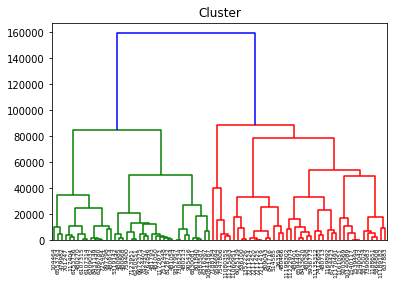

In [0]:
#Step 6: Plot the cluster dendrogram and export it to desired location

# Perform the necessary imports for Clustering
%matplotlib inline
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(df2, method='complete') 

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,labels=propid, #specify labels here as a propid variable containig property IDs from previous step, 
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.title("Cluster")

#Saving Plot to pdf file 

plt.savefig('/content/drive/Shared drives/Capstone Group #4/Cluster.pdf')

#for loca drive speficy your local folder where to save the file. Fo example, "C:/Users/Agastya Bhavana/Downloads"

plt.show()

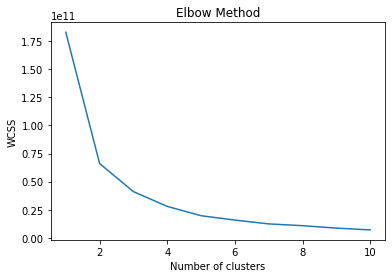

In [0]:
#Step 7: 
#Identify ideal number of clusters: we select the number of clusters where the change in WCSS begins to level off (elbow method)

import random
random.seed(1)

from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
wcss = []
for i in range(1, 11): #choose range of clusters 
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [0]:
#Step 8:

#KMeans Clustering with ideal number of cluster 

# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance with ideal number of clusters. Speficy number of ideal clusters here as n_clusters=
kmeans = KMeans(n_clusters=4, random_state=222) #specify ideal number of clusters here n_clusters=4

# Create pipeline
pipeline = make_pipeline(scaler,kmeans)

# Fit the pipeline to samples
pipeline.fit(df2)

# Calculate the cluster labels for each record 
labels = pipeline.predict(df2)

In [0]:
#View all cluster labels 

print(labels)

[1 2 2 2 2 3 3 3 3 1 1 0 1 1 1 1 0 1 3 1 1 2 3 2 0 3 3 3 2 1 2 1 1 0 0 0 0
 0 0 0 0 1 1 2 1 2 1 1 3 3 3 3 1 1 1 2 2 1 1 3 3 1 3 1 1 1 1 1 1 1 2 2 1 3
 1 0 0 1 3 2 1 2]


In [0]:
#Number of identified cluster labels 
len(labels)

82

In [0]:
#Step 9:
#Adding clusters for each record into a table 

df["Cluster"] = labels

In [0]:
df.head()

,PropertyID,PropertyType,NPA,Property Address,For Sale Price,Percent Leased,Land Area (AC),Number Of Parking Spaces,Rent/SF/Yr,2019 Med HH Inc(3m),2019 Population(3m),2024 Population(3m),Housing Density,Transit Proximity,Transit Ridership,Street Connectivitty,Sidewalk availability,Income Growth,% Pop Grwth 2010-2019(3m),% Pop Grwth 2019-2024(3m),Crime,Sale Company Name,Primary Agent Name,Property Manager Name,Submarket Name,Zip,Cluster
0,5875024,Industrial,78,14125 S Bridge Cir,8500000.0,100.0,13.93,239.0,$7.00,79554,50561,55968,93.47,93.47,27,1.17,49.4,29.12,25.70,10.69,3965,Avison Young,Henry Lobb,Lake South Point Real Estate LLC,State Line Ind,28273,1
2,6553763,Retail,3,211 East Blvd,2375000.0,0.0,0.32,10.0,$35.00,66711,128695,143898,100.00,100.00,34,1.48,83.6,60.03,47.50,11.81,2749,Coldwell Banker Commercial MECA,Robert Pressley,NaN,Inner Southeast Ret,28203-4719,2
3,6107315,Industrial,30,217 Fairwood Ave,2000000.0,0.0,0.29,10.0,$15.00,67349,113699,126754,100.00,100.00,66,1.23,60.0,59.00,43.21,11.48,2749,NaN,Greg Starr,NaN,Tyvola Rd Ind,28203,2
4,6107314,Industrial,30,225 Fairwood Ave,2000000.0,0.0,0.21,4.0,$15.00,67089,114167,127263,100.00,100.00,66,1.23,60.0,59.22,43.06,11.47,2749,NaN,Greg Starr,NaN,Tyvola Rd Ind,28203,2
5,997298,Retail,369,2103 N Graham St,2999000.0,90.1,1.68,34.0,$18.00,54052,117340,131005,100.00,100.00,34,1.29,60.8,57.67,45.29,11.65,2494,Axia Realty Partners,Matthew Hagler,NaN,Northeast Ret,28206,2


In [0]:
#Sorting clusters in descending order 

df.sort_values(by="Cluster")

,PropertyID,PropertyType,NPA,Property Address,For Sale Price,Percent Leased,Land Area (AC),Number Of Parking Spaces,Rent/SF/Yr,2019 Med HH Inc(3m),2019 Population(3m),2024 Population(3m),Housing Density,Transit Proximity,Transit Ridership,Street Connectivitty,Sidewalk availability,Income Growth,% Pop Grwth 2010-2019(3m),% Pop Grwth 2019-2024(3m),Crime,Sale Company Name,Primary Agent Name,Property Manager Name,Submarket Name,Zip,Cluster
82,7824407,Retail,186,7511 E Independence Blvd,2495000.0,100.0,1.2500,NaN,$11.81 - 14.43 (Est.),51583,86277,92914,72.69,72.69,83,1.07,58.8,19.09,7.50,7.69,2527,"The Nichols Company, Inc.",NaN,NaN,East Ret,28227-9406,0
76,6386780,Retail,52,5112 E Independence Blvd,2500000.0,100.0,0.7884,44.0,$16.10 - 19.67 (Est.),43429,117998,127805,100.00,100.00,62,1.05,72.6,19.76,12.06,8.31,2527,NaN,NaN,NaN,East Ret,28212,0
77,725484,Retail,52,5122 E Independence Blvd,2500000.0,100.0,1.0000,36.0,$17.32 - 21.16 (Est.),43406,118148,127966,100.00,100.00,62,1.05,72.6,19.68,12.05,8.31,2527,NaN,NaN,Independence Wholesale Food Distributors,East Ret,28212,0
78,801840,Retail,52,6070 E Independence Blvd,5500000.0,57.1,8.6200,500.0,$3.19 - 3.90 (Est.),47498,103801,112258,100.00,100.00,62,1.05,72.6,20.68,10.82,8.15,2527,Park Commercial Real Estate,NaN,NaN,East Ret,28212-6839,0
79,9383587,Retail,52,6120 E Independence Blvd,2725487.0,100.0,1.0600,NaN,$16.07 - 19.64 (Est.),47355,103369,111806,100.00,100.00,62,1.05,72.6,20.44,10.93,8.16,2527,Stan Johnson Company,NaN,NaN,East Ret,28212-6839,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48,26359,Industrial,174,2323 Center Park Dr,3750000.0,100.0,4.4000,20.0,$5.00 - 6.11 (Est.),55433,35256,38552,28.23,28.23,1,1.14,21.8,24.78,20.63,9.35,3215,Gibson Smith Realty Co.,NaN,NaN,Tyvola Rd Ind,28217-2908,3
119,11215463,Retail,284,6311 Providence Farm Ln,4424000.0,100.0,1.0400,78.0,$23.05 - 28.18 (Est.),115731,57797,62344,0.00,0.00,0,1.21,27.1,23.88,18.86,7.87,2430,"Berkeley Capital Advisors, LLC",NaN,NaN,Outer Southeast Ret,28277-7253,3
118,11080355,Retail,284,6307 Providence Farm Ln,3500000.0,100.0,0.8300,NaN,$23.94 - 29.26 (Est.),118021,56415,61367,0.00,0.00,0,1.21,27.1,28.52,16.46,8.78,2430,"Berkeley Capital Advisors, LLC",NaN,NaN,Outer Southeast Ret,28277,3
32,9584694,Retail,170,9208 Ardrey Kell Rd,4592592.0,100.0,6.0900,155.0,$32.63 - 39.88 (Est.),118201,66053,71592,0.00,0.00,0,1.13,68.0,24.99,12.95,8.39,2430,Lenox Development Group,Scott Mileham,NaN,Outer Southeast Ret,28277-0786,3


In [0]:
# Step 10:
#Standardizing data for Parallel Coordinates Plot 

from sklearn.preprocessing import MinMaxScaler 
mms = MinMaxScaler() 

df2 = mms.fit_transform(df2)
df2 = pd.DataFrame(df2)
df2.head
df2.columns = ['2019 Med HH Inc(3m)','2019 Population(3m)','2024 Population(3m)','Housing Density','Transit Proximity','Transit Ridership', 'Street Connectivitty',
               'Sidewalk availability','Income Growth','% Pop Grwth 2010-2019(3m)', '% Pop Grwth 2019-2024(3m)', 'Crime'] #renaming column names 
               

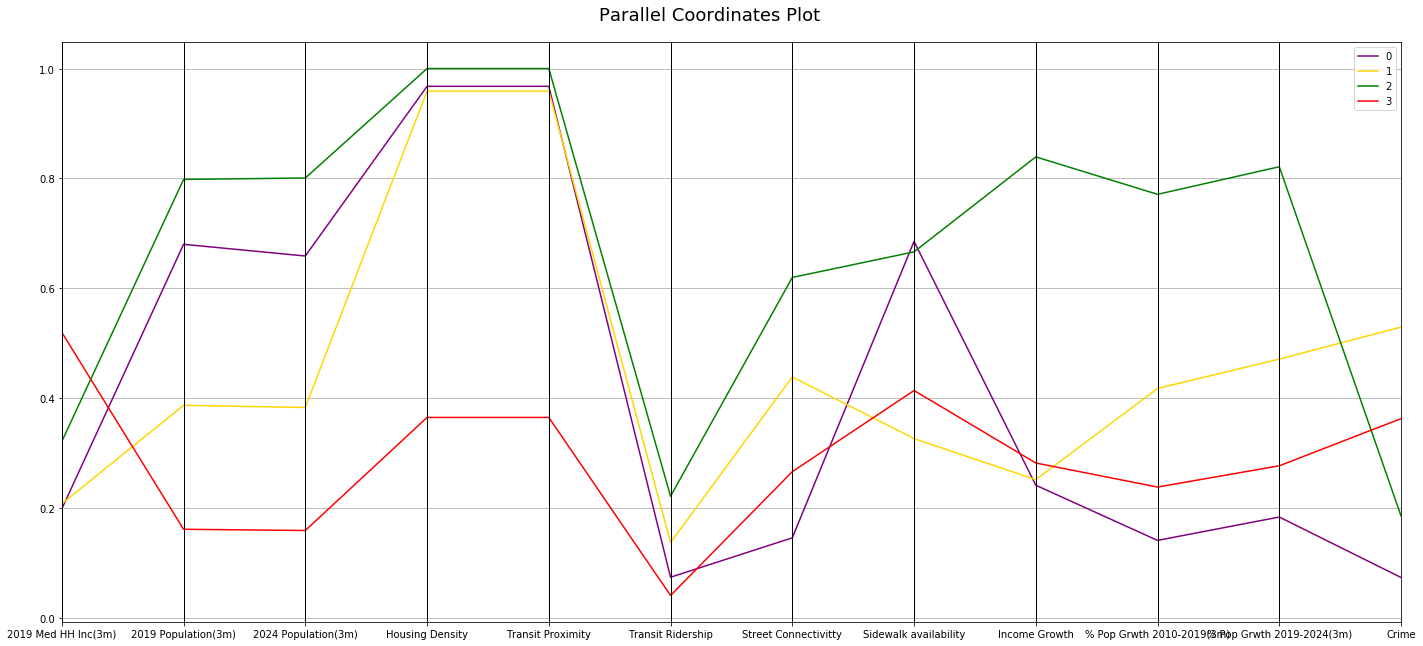

In [0]:
#Step 11: 
#Viewing the Parallel Coordinates Plot and Identify Best Clusters 

import random
random.seed(1)

df2["Cluster"] = labels #save clusters from df2 data as a varible labels 

df3 = df2.groupby("Cluster").mean() #group records by "Clsuters" and find their mean 

df3["Cluster"] = [0,1,2,3] # specify cluster names 

# Plotting 

from pandas.plotting import parallel_coordinates

fig = plt.figure(figsize=(24, 10))
title = fig.suptitle("Parallel Coordinates Plot", fontsize=18)
fig.subplots_adjust(top=0.93, wspace=0)

pc = parallel_coordinates(df3, 
                          'Cluster', 
                          color=('purple', 'gold', 'green', 'red'))




In [0]:
#Step 12: Isolating best clusters. Here we are isolating clusters 2 and 0. 

df_cluster_1 = df[df.Cluster==2 ] #isolating cluster 2
df_cluster_2 =  df[df.Cluster==0 ]  #isolating cluster 0

df_cluster_1.shape

(16, 27)

In [0]:
#Step 13: combining best clusters 
df_cluster_1 = pd.concat([df_cluster_1,df_cluster_2])

In [0]:
df_cluster_2.shape

(13, 27)

In [0]:
#Step 14: Save data with identified clusters. 

df_cluster_1.to_csv('/content/drive/Shared drives/Capstone Group #4/OutputwithBestCluster.csv')

In [0]:
#Step 15: Separate your data into different types of properties. Here we are isolating Flex, Retail and Industrial properties into separate tables by 'PropertyType' column. 

df_cluster_1.columns

df_flex = df_cluster_1[df_cluster_1['PropertyType']=='Flex'] #Separating flex properties 
df_retail = df_cluster_1[df_cluster_1['PropertyType']=='Retail'] #Separating retail properties 
df_industrial = df_cluster_1[df_cluster_1['PropertyType']=='Industrial'] #Separating industrial properties 



In [0]:
df_flex

,PropertyID,PropertyType,NPA,Property Address,For Sale Price,Percent Leased,Land Area (AC),Number Of Parking Spaces,Rent/SF/Yr,2019 Med HH Inc(3m),2019 Population(3m),2024 Population(3m),Housing Density,Transit Proximity,Transit Ridership,Street Connectivitty,Sidewalk availability,Income Growth,% Pop Grwth 2010-2019(3m),% Pop Grwth 2019-2024(3m),Crime,Sale Company Name,Primary Agent Name,Property Manager Name,Submarket Name,Zip,Cluster
90,701247,Flex,370,3400 Latrobe Dr,3500000.0,100.0,3.49,50.0,$11.29 - 13.79 (Est.),66039,119283,130938,100.00,100.00,56,1.21,92.6,43.63,24.53,9.77,2749,Keller Williams Realty South Park,NaN,NaN,East Ind,28211-4847,2
81,759400,Flex,180,6625 E Independence Blvd,3800000.0,0.0,1.50,140.0,$10.78 - 13.17 (Est.),48298,94452,102235,89.64,89.64,59,1.11,54.9,19.59,11.53,8.24,2527,Chuck Darwich,NaN,NaN,East Ind,28212-7255,0


In [0]:
df_retail

,PropertyID,PropertyType,NPA,Property Address,For Sale Price,Percent Leased,Land Area (AC),Number Of Parking Spaces,Rent/SF/Yr,2019 Med HH Inc(3m),2019 Population(3m),2024 Population(3m),Housing Density,Transit Proximity,Transit Ridership,Street Connectivitty,Sidewalk availability,Income Growth,% Pop Grwth 2010-2019(3m),% Pop Grwth 2019-2024(3m),Crime,Sale Company Name,Primary Agent Name,Property Manager Name,Submarket Name,Zip,Cluster
2,6553763,Retail,3,211 East Blvd,2375000.0,0.00,0.3200,10.0,$35.00,66711,128695,143898,100.00,100.00,34,1.48,83.6,60.03,47.50,11.81,2749,Coldwell Banker Commercial MECA,Robert Pressley,NaN,Inner Southeast Ret,28203-4719,2
5,997298,Retail,369,2103 N Graham St,2999000.0,90.10,1.6800,34.0,$18.00,54052,117340,131005,100.00,100.00,34,1.29,60.8,57.67,45.29,11.65,2494,Axia Realty Partners,Matthew Hagler,NaN,Northeast Ret,28206,2
64,1172973,Retail,6,3144 Freedom Dr,7500000.0,55.46,15.1300,482.0,$2.95 - 3.61 (Est.),43290,87483,96999,100.00,100.00,74,1.28,41.2,41.82,35.99,10.88,2494,"Centerpoint Group, LLC",Daryl Hayes,NaN,Northwest Ret,28208-3870,2
114,104464,Retail,315,1212 Pecan Ave,3400000.0,100.00,0.2300,NaN,$12.00 - 14.66 (Est.),65352,134290,149249,100.00,100.00,50,1.27,58.6,59.25,39.02,11.14,2749,"The Nichols Company, Inc.",Gary Prusiensky,NaN,East Ret,28205-5038,2
154,6153736,Retail,388,1926 S Tryon St,3267000.0,100.00,0.2900,12.0,$20.14 - 24.62 (Est.),64900,120604,134594,100.00,100.00,273,1.49,77.0,59.42,44.71,11.60,2749,Legacy Real Estate Advisors LLC,NaN,NaN,Inner Southeast Ret,28203,2
169,10844387,Retail,361,2320 Wilkinson Blvd,5082177.0,100.00,1.8200,NaN,$13.43 - 16.42 (Est.),52732,109675,122490,100.00,100.00,39,1.43,55.8,62.21,45.79,11.68,2494,Matthews Real Estate Investment Services,Josh Bishop,NaN,Northwest Ret,28208-5612,2
177,905416,Retail,290,225 E Woodlawn Rd,3900000.0,100.00,1.5000,142.0,$18.90 - 23.11 (Est.),65374,99918,110405,100.00,100.00,425,1.23,47.4,47.85,31.78,10.50,3215,Roger's Real Estate,NaN,NaN,Inner Southeast Ret,28217,2
30,6754423,Retail,323,9451 Albemarle Rd,2733300.0,100.00,1.2000,NaN,$15.89 - 19.42 (Est.),52580,63088,68438,99.44,99.44,36,1.07,49.1,14.94,13.36,8.48,2527,Marcus & Millichap,NaN,NaN,East Ret,28227,0
38,7188184,Retail,224,9239 Baybrook Ln,2250000.0,0.00,2.5200,18.0,$16.12 - 19.70 (Est.),90090,76616,82319,96.18,96.18,9,1.12,46.8,32.47,5.76,7.44,2430,New South Properties of the Carolinas,Steve Slattery,NaN,Outer Southeast Ret,28277,0
74,6209032,Retail,52,5100 E Independence Blvd,2500000.0,100.00,0.3892,18.0,$8.32 - 10.17 (Est.),43677,118811,128681,100.00,100.00,62,1.05,72.6,19.85,12.03,8.31,2527,NaN,NaN,NaN,East Ret,28212-6166,0


In [0]:
df_industrial

,PropertyID,PropertyType,NPA,Property Address,For Sale Price,Percent Leased,Land Area (AC),Number Of Parking Spaces,Rent/SF/Yr,2019 Med HH Inc(3m),2019 Population(3m),2024 Population(3m),Housing Density,Transit Proximity,Transit Ridership,Street Connectivitty,Sidewalk availability,Income Growth,% Pop Grwth 2010-2019(3m),% Pop Grwth 2019-2024(3m),Crime,Sale Company Name,Primary Agent Name,Property Manager Name,Submarket Name,Zip,Cluster
3,6107315,Industrial,30,217 Fairwood Ave,2000000.0,0.00,0.29,10.0,$15.00,67349,113699,126754,100.0,100.0,66,1.23,60.0,59.00,43.21,11.48,2749,NaN,Greg Starr,NaN,Tyvola Rd Ind,28203,2
4,6107314,Industrial,30,225 Fairwood Ave,2000000.0,0.00,0.21,4.0,$15.00,67089,114167,127263,100.0,100.0,66,1.23,60.0,59.22,43.06,11.47,2749,NaN,Greg Starr,NaN,Tyvola Rd Ind,28203,2
35,480914,Industrial,21,332 Atando Ave,3900000.0,100.00,4.24,80.0,$7.37 - 9.01 (Est.),47365,121057,134268,100.0,100.0,195,1.18,47.1,40.15,36.38,10.91,2494,AGC Real Estate,John D,NaN,Sugar Creek Ind,28206-1970,2
37,480401,Industrial,290,4337 Barringer Dr,6985000.0,100.00,9.48,46.0,$3.71 - 4.53 (Est.),57083,79433,88119,100.0,100.0,425,1.23,47.4,50.26,36.64,10.94,3215,MPV Properties,Billy Thomas,NaN,Tyvola Rd Ind,28217-1557,2
58,117404,Industrial,338,2400 Distribution St,2900000.0,75.90,0.70,10.0,$7.47 - 9.13 (Est.),67271,120705,134626,100.0,100.0,71,1.27,76.0,59.42,43.86,11.53,2749,Legacy Real Estate Advisors LLC,Jay Snover,NaN,I-277/Remount Rd Ind,28203-5026,2
95,480213,Industrial,290,610 Minuet Ln,2195000.0,0.00,1.57,30.0,$10.10 - 12.35 (Est.),66574,97780,107891,100.0,100.0,425,1.23,47.4,46.34,30.16,10.34,3215,Southend Properties,NaN,NaN,Tyvola Rd Ind,28217-2713,2
112,479982,Industrial,339,308 W Palmer St,2100000.0,0.00,0.85,NaN,$9.04 - 11.05 (Est.),62673,127022,142302,100.0,100.0,265,1.38,55.3,62.58,50.43,12.03,2749,Tradd Commercial Real Estate of Charlotte,Brooks Whiteside,NaN,I-277/Remount Rd Ind,28203-4040,2
143,480270,Industrial,388,2213 Toomey Ave,3200000.0,100.00,2.08,50.0,$9.09 - 11.11 (Est.),62746,114476,127773,100.0,100.0,273,1.49,77.0,63.44,44.90,11.62,2749,Geoff Campbell Realty,NaN,NaN,I-277/Remount Rd Ind,28203-4634,2
17,8128732,Industrial,100,6924 Orr Rd,5244000.0,78.08,11.45,300.0,$4.25,41122,88665,96813,100.0,100.0,63,1.05,44.6,12.74,20.74,9.19,2907,Avison Young,Chris Skibinski,NaN,Mecklenburg Line Ind,28213-6443,0
75,8431149,Industrial,52,5112 E Independence Blvd,2500000.0,100.00,0.79,10.0,$7.79 - 9.53 (Est.),43463,117824,127618,100.0,100.0,62,1.05,72.6,19.80,12.07,8.31,2527,NaN,NaN,NaN,East Ind,28212,0


In [0]:
#Step 16: Isolate variables that will be used for quantile scoring. 

df_industrial = df_industrial.loc[:,['PropertyID','PropertyType','Property Address','2019 Med HH Inc(3m)','2019 Population(3m)','2024 Population(3m)','Transit Proximity','Income Growth ','% Pop Grwth 2010-2019(3m)','% Pop Grwth 2019-2024(3m)','Crime']]

df_flex = df_flex.loc[:,['PropertyID','PropertyType','Property Address','2019 Med HH Inc(3m)','2019 Population(3m)','2024 Population(3m)','Transit Proximity','Income Growth ','% Pop Grwth 2010-2019(3m)','% Pop Grwth 2019-2024(3m)','Crime']]

df_retail = df_retail.loc[:,['PropertyID','PropertyType','Property Address','2019 Med HH Inc(3m)','2019 Population(3m)','2024 Population(3m)','Transit Proximity','Income Growth ','% Pop Grwth 2010-2019(3m)','% Pop Grwth 2019-2024(3m)','Crime']]


In [0]:

df_industrial.describe()

,PropertyID,2019 Med HH Inc(3m),2019 Population(3m),2024 Population(3m),Transit Proximity,Income Growth,% Pop Grwth 2010-2019(3m),% Pop Grwth 2019-2024(3m),Crime
count,1.000000e+01,10.000000,10.000000,10.000000,10.0,10.000000,10.000000,10.000000,10.000000
mean,3.129369e+06,58273.500000,109482.800000,121342.700000,100.0,47.295000,36.145000,10.782000,2810.300000
std,3.574557e+06,10452.152508,15545.903196,17683.421678,0.0,18.047154,11.976848,1.186112,244.041914
min,1.174040e+05,41122.000000,79433.000000,88119.000000,100.0,12.740000,12.070000,8.310000,2494.000000
25%,4.802272e+05,49794.500000,101759.750000,112606.750000,100.0,41.697500,31.715000,10.482500,2749.000000
50%,4.806575e+05,62709.500000,114321.500000,127440.500000,100.0,54.630000,39.850000,11.205000,2749.000000
75%,6.107315e+06,66960.250000,119984.750000,132644.250000,100.0,59.370000,43.697500,11.517500,2867.500000
max,8.431149e+06,67349.000000,127022.000000,142302.000000,100.0,63.440000,50.430000,12.030000,3215.000000


In [0]:
#Step 17: For industrial properties assign quantile score for 2019 Med HH Inc(3m)

q1 = df_industrial["2019 Med HH Inc(3m)"].quantile(0.25) #25% quantile 
q2 = df_industrial["2019 Med HH Inc(3m)"].quantile(0.50) #50% quantile 
q3 = df_industrial["2019 Med HH Inc(3m)"].quantile(0.75) #75% quantile 

def scorer_2019MedHHInc(dfr):
  pop = dfr["2019 Med HH Inc(3m)"]

  if (pop >= q1 and pop < q2):
    return int(2) #assign score of 2 if value is between 25% and 50%
  if (pop >= q2 and pop< q3):
    return int(3) #assign score of 3 if value is between 50% and 75%
  if pop >= q3:
      return int(4) #assign score of 4 if value is higher than & 75%
  else:
    return int(1) #assign score of 1 if value is between 0% and 25%

df_industrial["score 2019 Med HH Inc(3m)"] = df_industrial.apply(scorer_2019MedHHInc,axis=1) #save score to industiral data set; here we name the new column to be "score 2019 Med HH Inc(3m)"

df_industrial.head()



,PropertyID,PropertyType,Property Address,2019 Med HH Inc(3m),2019 Population(3m),2024 Population(3m),Transit Proximity,Income Growth,% Pop Grwth 2010-2019(3m),% Pop Grwth 2019-2024(3m),Crime,score 2019 Med HH Inc(3m)
3,6107315,Industrial,217 Fairwood Ave,67349,113699,126754,100.0,59.00,43.21,11.48,2749,4
4,6107314,Industrial,225 Fairwood Ave,67089,114167,127263,100.0,59.22,43.06,11.47,2749,4
35,480914,Industrial,332 Atando Ave,47365,121057,134268,100.0,40.15,36.38,10.91,2494,1
37,480401,Industrial,4337 Barringer Dr,57083,79433,88119,100.0,50.26,36.64,10.94,3215,2
58,117404,Industrial,2400 Distribution St,67271,120705,134626,100.0,59.42,43.86,11.53,2749,4


In [0]:
#Step 17: For flex properties assign quantile score for 2019 Med HH Inc(3m)

q1 = df_flex["2019 Med HH Inc(3m)"].quantile(0.25)
q2 = df_flex["2019 Med HH Inc(3m)"].quantile(0.50)
q3 = df_flex["2019 Med HH Inc(3m)"].quantile(0.75)

def scorer_2019MedHHInc(dfr):
  pop = dfr["2019 Med HH Inc(3m)"]
  if (pop >= q1 and pop < q2):
    return int(2)
  if (pop >= q2 and pop< q3):
    return int(3)
  if pop >= q3:
      return int(4)
  else:
    return int(1)

df_flex["score 2019 Med HH Inc(3m)"] = df_flex.apply(scorer_2019MedHHInc,axis=1)

df_flex.head()

,PropertyID,PropertyType,Property Address,2019 Med HH Inc(3m),2019 Population(3m),2024 Population(3m),Transit Proximity,Income Growth,% Pop Grwth 2010-2019(3m),% Pop Grwth 2019-2024(3m),Crime,score 2019 Med HH Inc(3m)
90,701247,Flex,3400 Latrobe Dr,66039,119283,130938,100.00,43.63,24.53,9.77,2749,4
81,759400,Flex,6625 E Independence Blvd,48298,94452,102235,89.64,19.59,11.53,8.24,2527,1


In [0]:
#Step 17: For retail properties assign quantile score for 2019 Med HH Inc(3m)

q1 = df_retail["2019 Med HH Inc(3m)"].quantile(0.25)
q2 = df_retail["2019 Med HH Inc(3m)"].quantile(0.50)
q3 = df_retail["2019 Med HH Inc(3m)"].quantile(0.75)

def scorer_2019MedHHInc(dfr):
  pop = dfr["2019 Med HH Inc(3m)"]
  if (pop >= q1 and pop < q2):
    return int(2)
  if (pop >= q2 and pop< q3):
    return int(3)
  if pop >= q3:
      return int(4)
  else:
    return int(1)

df_retail["score 2019 Med HH Inc(3m)"] = df_retail.apply(scorer_2019MedHHInc,axis=1)

df_retail.head()

,PropertyID,PropertyType,Property Address,2019 Med HH Inc(3m),2019 Population(3m),2024 Population(3m),Transit Proximity,Income Growth,% Pop Grwth 2010-2019(3m),% Pop Grwth 2019-2024(3m),Crime,score 2019 Med HH Inc(3m)
2,6553763,Retail,211 East Blvd,66711,128695,143898,100.0,60.03,47.50,11.81,2749,4
5,997298,Retail,2103 N Graham St,54052,117340,131005,100.0,57.67,45.29,11.65,2494,3
64,1172973,Retail,3144 Freedom Dr,43290,87483,96999,100.0,41.82,35.99,10.88,2494,1
114,104464,Retail,1212 Pecan Ave,65352,134290,149249,100.0,59.25,39.02,11.14,2749,4
154,6153736,Retail,1926 S Tryon St,64900,120604,134594,100.0,59.42,44.71,11.60,2749,4


In [0]:
#Step 17: For industrial properties assign quantile score for 2019 Population(3m)

q1 = df_industrial["2019 Population(3m)"].quantile(0.25)
q2 = df_industrial["2019 Population(3m)"].quantile(0.50)
q3 = df_industrial["2019 Population(3m)"].quantile(0.75)

def scorer_inc(dfr):
  pop = dfr["2019 Population(3m)"]
  if (pop >= q1 and pop < q2):
    return int(2)
  if (pop >= q2 and pop< q3):
    return int(3)
  if pop >= q3:
      return int(4)
  else:
    return int(1)

df_industrial["score_2019 Population(3m)"] = df_industrial.apply(scorer_inc,axis=1)

df_industrial
  


,PropertyID,PropertyType,Property Address,2019 Med HH Inc(3m),2019 Population(3m),2024 Population(3m),Transit Proximity,Income Growth,% Pop Grwth 2010-2019(3m),% Pop Grwth 2019-2024(3m),Crime,score 2019 Med HH Inc(3m),score_2019 Population(3m)
3,6107315,Industrial,217 Fairwood Ave,67349,113699,126754,100.0,59.00,43.21,11.48,2749,4,2
4,6107314,Industrial,225 Fairwood Ave,67089,114167,127263,100.0,59.22,43.06,11.47,2749,4,2
35,480914,Industrial,332 Atando Ave,47365,121057,134268,100.0,40.15,36.38,10.91,2494,1,4
37,480401,Industrial,4337 Barringer Dr,57083,79433,88119,100.0,50.26,36.64,10.94,3215,2,1
58,117404,Industrial,2400 Distribution St,67271,120705,134626,100.0,59.42,43.86,11.53,2749,4,4
95,480213,Industrial,610 Minuet Ln,66574,97780,107891,100.0,46.34,30.16,10.34,3215,3,1
112,479982,Industrial,308 W Palmer St,62673,127022,142302,100.0,62.58,50.43,12.03,2749,2,4
143,480270,Industrial,2213 Toomey Ave,62746,114476,127773,100.0,63.44,44.90,11.62,2749,3,3
17,8128732,Industrial,6924 Orr Rd,41122,88665,96813,100.0,12.74,20.74,9.19,2907,1,1
75,8431149,Industrial,5112 E Independence Blvd,43463,117824,127618,100.0,19.80,12.07,8.31,2527,1,3


In [0]:
#Step 17: For flex properties assign quantile score for 2019 Population(3m)
q1 = df_flex["2019 Population(3m)"].quantile(0.25)
q2 = df_flex["2019 Population(3m)"].quantile(0.50)
q3 = df_flex["2019 Population(3m)"].quantile(0.75)

def scorer_inc(dfr):
  pop = dfr["2019 Population(3m)"]
  if (pop >= q1 and pop < q2):
    return int(2)
  if (pop >= q2 and pop< q3):
    return int(3)
  if pop >= q3:
      return int(4)
  else:
    return int(1)

df_flex["score_2019 Population(3m)"] = df_flex.apply(scorer_inc,axis=1)

df_flex

,PropertyID,PropertyType,Property Address,2019 Med HH Inc(3m),2019 Population(3m),2024 Population(3m),Transit Proximity,Income Growth,% Pop Grwth 2010-2019(3m),% Pop Grwth 2019-2024(3m),Crime,score 2019 Med HH Inc(3m),score_2019 Population(3m)
90,701247,Flex,3400 Latrobe Dr,66039,119283,130938,100.00,43.63,24.53,9.77,2749,4,4
81,759400,Flex,6625 E Independence Blvd,48298,94452,102235,89.64,19.59,11.53,8.24,2527,1,1


In [0]:
#Step 17: For retail properties assign quantile score for 2019 Population(3m)

q1 = df_retail["2019 Population(3m)"].quantile(0.25)
q2 = df_retail["2019 Population(3m)"].quantile(0.50)
q3 = df_retail["2019 Population(3m)"].quantile(0.75)

def scorer_inc(dfr):
  pop = dfr["2019 Population(3m)"]
  if (pop >= q1 and pop < q2):
    return int(2)
  if (pop >= q2 and pop< q3):
    return int(3)
  if pop >= q3:
      return int(4)
  else:
    return int(1)

df_retail["score_2019 Population(3m)"] = df_retail.apply(scorer_inc,axis=1)

df_retail

,PropertyID,PropertyType,Property Address,2019 Med HH Inc(3m),2019 Population(3m),2024 Population(3m),Transit Proximity,Income Growth,% Pop Grwth 2010-2019(3m),% Pop Grwth 2019-2024(3m),Crime,score 2019 Med HH Inc(3m),score_2019 Population(3m)
2,6553763,Retail,211 East Blvd,66711,128695,143898,100.00,60.03,47.50,11.81,2749,4,4
5,997298,Retail,2103 N Graham St,54052,117340,131005,100.00,57.67,45.29,11.65,2494,3,3
64,1172973,Retail,3144 Freedom Dr,43290,87483,96999,100.00,41.82,35.99,10.88,2494,1,1
114,104464,Retail,1212 Pecan Ave,65352,134290,149249,100.00,59.25,39.02,11.14,2749,4,4
154,6153736,Retail,1926 S Tryon St,64900,120604,134594,100.00,59.42,44.71,11.60,2749,4,4
169,10844387,Retail,2320 Wilkinson Blvd,52732,109675,122490,100.00,62.21,45.79,11.68,2494,3,3
177,905416,Retail,225 E Woodlawn Rd,65374,99918,110405,100.00,47.85,31.78,10.50,3215,4,2
30,6754423,Retail,9451 Albemarle Rd,52580,63088,68438,99.44,14.94,13.36,8.48,2527,3,1
38,7188184,Retail,9239 Baybrook Ln,90090,76616,82319,96.18,32.47,5.76,7.44,2430,4,1
74,6209032,Retail,5100 E Independence Blvd,43677,118811,128681,100.00,19.85,12.03,8.31,2527,1,4


In [0]:
#Step 17: For industrial properties assign quantile score for 2024 Population(3m)

q1 = df_industrial["2024 Population(3m)"].quantile(0.25)
q2 = df_industrial["2024 Population(3m)"].quantile(0.50)
q3 = df_industrial["2024 Population(3m)"].quantile(0.75)

def scorer_inc(dfr):
  pop = dfr["2024 Population(3m)"]
  if (pop >= q1 and pop < q2):
    return int(2)
  if (pop >= q2 and pop< q3):
    return int(3)
  if pop >= q3:
      return int(4)
  else:
    return int(1)

df_industrial["score_2014_population"] = df_industrial.apply(scorer_inc,axis=1)

df_industrial


,PropertyID,PropertyType,Property Address,2019 Med HH Inc(3m),2019 Population(3m),2024 Population(3m),Transit Proximity,Income Growth,% Pop Grwth 2010-2019(3m),% Pop Grwth 2019-2024(3m),Crime,score 2019 Med HH Inc(3m),score_2019 Population(3m),score_2014_population
3,6107315,Industrial,217 Fairwood Ave,67349,113699,126754,100.0,59.00,43.21,11.48,2749,4,2,2
4,6107314,Industrial,225 Fairwood Ave,67089,114167,127263,100.0,59.22,43.06,11.47,2749,4,2,2
35,480914,Industrial,332 Atando Ave,47365,121057,134268,100.0,40.15,36.38,10.91,2494,1,4,4
37,480401,Industrial,4337 Barringer Dr,57083,79433,88119,100.0,50.26,36.64,10.94,3215,2,1,1
58,117404,Industrial,2400 Distribution St,67271,120705,134626,100.0,59.42,43.86,11.53,2749,4,4,4
95,480213,Industrial,610 Minuet Ln,66574,97780,107891,100.0,46.34,30.16,10.34,3215,3,1,1
112,479982,Industrial,308 W Palmer St,62673,127022,142302,100.0,62.58,50.43,12.03,2749,2,4,4
143,480270,Industrial,2213 Toomey Ave,62746,114476,127773,100.0,63.44,44.90,11.62,2749,3,3,3
17,8128732,Industrial,6924 Orr Rd,41122,88665,96813,100.0,12.74,20.74,9.19,2907,1,1,1
75,8431149,Industrial,5112 E Independence Blvd,43463,117824,127618,100.0,19.80,12.07,8.31,2527,1,3,3


In [0]:
#Step 17: For flex properties assign quantile score for 2024 Population(3m)

q1 = df_flex["2024 Population(3m)"].quantile(0.25)
q2 = df_flex["2024 Population(3m)"].quantile(0.50)
q3 = df_flex["2024 Population(3m)"].quantile(0.75)

def scorer_inc(dfr):
  pop = dfr["2024 Population(3m)"]
  if (pop >= q1 and pop < q2):
    return int(2)
  if (pop >= q2 and pop< q3):
    return int(3)
  if pop >= q3:
      return int(4)
  else:
    return int(1)

df_flex["score_2014_population"] = df_flex.apply(scorer_inc,axis=1)

df_flex


,PropertyID,PropertyType,Property Address,2019 Med HH Inc(3m),2019 Population(3m),2024 Population(3m),Transit Proximity,Income Growth,% Pop Grwth 2010-2019(3m),% Pop Grwth 2019-2024(3m),Crime,score 2019 Med HH Inc(3m),score_2019 Population(3m),score_2014_population
90,701247,Flex,3400 Latrobe Dr,66039,119283,130938,100.00,43.63,24.53,9.77,2749,4,4,4
81,759400,Flex,6625 E Independence Blvd,48298,94452,102235,89.64,19.59,11.53,8.24,2527,1,1,1


In [0]:
#Step 17: For retail properties assign quantile score for 2024 Population(3m)

q1 = df_retail["2024 Population(3m)"].quantile(0.25)
q2 = df_retail["2024 Population(3m)"].quantile(0.50)
q3 = df_retail["2024 Population(3m)"].quantile(0.75)

def scorer_inc(dfr):
  pop = dfr["2024 Population(3m)"]
  if (pop >= q1 and pop < q2):
    return int(2)
  if (pop >= q2 and pop< q3):
    return int(3)
  if pop >= q3:
      return int(4)
  else:
    return int(1)

df_retail["score_2014_population"] = df_retail.apply(scorer_inc,axis=1)

df_retail


,PropertyID,PropertyType,Property Address,2019 Med HH Inc(3m),2019 Population(3m),2024 Population(3m),Transit Proximity,Income Growth,% Pop Grwth 2010-2019(3m),% Pop Grwth 2019-2024(3m),Crime,score 2019 Med HH Inc(3m),score_2019 Population(3m),score_2014_population
2,6553763,Retail,211 East Blvd,66711,128695,143898,100.00,60.03,47.50,11.81,2749,4,4,4
5,997298,Retail,2103 N Graham St,54052,117340,131005,100.00,57.67,45.29,11.65,2494,3,3,4
64,1172973,Retail,3144 Freedom Dr,43290,87483,96999,100.00,41.82,35.99,10.88,2494,1,1,1
114,104464,Retail,1212 Pecan Ave,65352,134290,149249,100.00,59.25,39.02,11.14,2749,4,4,4
154,6153736,Retail,1926 S Tryon St,64900,120604,134594,100.00,59.42,44.71,11.60,2749,4,4,4
169,10844387,Retail,2320 Wilkinson Blvd,52732,109675,122490,100.00,62.21,45.79,11.68,2494,3,3,3
177,905416,Retail,225 E Woodlawn Rd,65374,99918,110405,100.00,47.85,31.78,10.50,3215,4,2,2
30,6754423,Retail,9451 Albemarle Rd,52580,63088,68438,99.44,14.94,13.36,8.48,2527,3,1,1
38,7188184,Retail,9239 Baybrook Ln,90090,76616,82319,96.18,32.47,5.76,7.44,2430,4,1,1
74,6209032,Retail,5100 E Independence Blvd,43677,118811,128681,100.00,19.85,12.03,8.31,2527,1,4,4


In [0]:
#Step 17: For industrial properties assign quantile score for Transit Proximity

q1 = df_industrial['Transit Proximity'].quantile(0.25)
q2 = df_industrial['Transit Proximity'].quantile(0.50)
q3 = df_industrial['Transit Proximity'].quantile(0.75)

def scorer_inc(dfr):
  pop = dfr['Transit Proximity']
  if (pop >= q1 and pop < q2):
    return int(2)
  if (pop >= q2 and pop< q3):
    return int(3)
  if pop >= q3:
      return int(4)
  else:
    return int(1)

df_industrial["score_transit"] = df_industrial.apply(scorer_inc,axis=1)

df_industrial

,PropertyID,PropertyType,Property Address,2019 Med HH Inc(3m),2019 Population(3m),2024 Population(3m),Transit Proximity,Income Growth,% Pop Grwth 2010-2019(3m),% Pop Grwth 2019-2024(3m),Crime,score 2019 Med HH Inc(3m),score_2019 Population(3m),score_2014_population,score_transit
3,6107315,Industrial,217 Fairwood Ave,67349,113699,126754,100.0,59.00,43.21,11.48,2749,4,2,2,4
4,6107314,Industrial,225 Fairwood Ave,67089,114167,127263,100.0,59.22,43.06,11.47,2749,4,2,2,4
35,480914,Industrial,332 Atando Ave,47365,121057,134268,100.0,40.15,36.38,10.91,2494,1,4,4,4
37,480401,Industrial,4337 Barringer Dr,57083,79433,88119,100.0,50.26,36.64,10.94,3215,2,1,1,4
58,117404,Industrial,2400 Distribution St,67271,120705,134626,100.0,59.42,43.86,11.53,2749,4,4,4,4
95,480213,Industrial,610 Minuet Ln,66574,97780,107891,100.0,46.34,30.16,10.34,3215,3,1,1,4
112,479982,Industrial,308 W Palmer St,62673,127022,142302,100.0,62.58,50.43,12.03,2749,2,4,4,4
143,480270,Industrial,2213 Toomey Ave,62746,114476,127773,100.0,63.44,44.90,11.62,2749,3,3,3,4
17,8128732,Industrial,6924 Orr Rd,41122,88665,96813,100.0,12.74,20.74,9.19,2907,1,1,1,4
75,8431149,Industrial,5112 E Independence Blvd,43463,117824,127618,100.0,19.80,12.07,8.31,2527,1,3,3,4


In [0]:
#Step 17: For flex properties assign quantile score for Transit Proximity

q1 = df_flex['Transit Proximity'].quantile(0.25)
q2 = df_flex['Transit Proximity'].quantile(0.50)
q3 = df_flex['Transit Proximity'].quantile(0.75)

def scorer_inc(dfr):
  pop = dfr['Transit Proximity']
  if (pop >= q1 and pop < q2):
    return int(2)
  if (pop >= q2 and pop< q3):
    return int(3)
  if pop >= q3:
      return int(4)
  else:
    return int(1)

df_flex["score_transit"] = df_flex.apply(scorer_inc,axis=1)

df_flex


,PropertyID,PropertyType,Property Address,2019 Med HH Inc(3m),2019 Population(3m),2024 Population(3m),Transit Proximity,Income Growth,% Pop Grwth 2010-2019(3m),% Pop Grwth 2019-2024(3m),Crime,score 2019 Med HH Inc(3m),score_2019 Population(3m),score_2014_population,score_transit
90,701247,Flex,3400 Latrobe Dr,66039,119283,130938,100.00,43.63,24.53,9.77,2749,4,4,4,4
81,759400,Flex,6625 E Independence Blvd,48298,94452,102235,89.64,19.59,11.53,8.24,2527,1,1,1,1


In [0]:
#Step 17: For retail properties assign quantile score for Transit Proximity

q1 = df_retail['Transit Proximity'].quantile(0.25)
q2 = df_retail['Transit Proximity'].quantile(0.50)
q3 = df_retail['Transit Proximity'].quantile(0.75)

def scorer_inc(dfr):
  pop = dfr['Transit Proximity']
  if (pop >= q1 and pop < q2):
    return int(2)
  if (pop >= q2 and pop< q3):
    return int(3)
  if pop >= q3:
      return int(4)
  else:
    return int(1)

df_retail["score_transit"] = df_retail.apply(scorer_inc,axis=1)

df_retail

,PropertyID,PropertyType,Property Address,2019 Med HH Inc(3m),2019 Population(3m),2024 Population(3m),Transit Proximity,Income Growth,% Pop Grwth 2010-2019(3m),% Pop Grwth 2019-2024(3m),Crime,score 2019 Med HH Inc(3m),score_2019 Population(3m),score_2014_population,score_transit
2,6553763,Retail,211 East Blvd,66711,128695,143898,100.00,60.03,47.50,11.81,2749,4,4,4,4
5,997298,Retail,2103 N Graham St,54052,117340,131005,100.00,57.67,45.29,11.65,2494,3,3,4,4
64,1172973,Retail,3144 Freedom Dr,43290,87483,96999,100.00,41.82,35.99,10.88,2494,1,1,1,4
114,104464,Retail,1212 Pecan Ave,65352,134290,149249,100.00,59.25,39.02,11.14,2749,4,4,4,4
154,6153736,Retail,1926 S Tryon St,64900,120604,134594,100.00,59.42,44.71,11.60,2749,4,4,4,4
169,10844387,Retail,2320 Wilkinson Blvd,52732,109675,122490,100.00,62.21,45.79,11.68,2494,3,3,3,4
177,905416,Retail,225 E Woodlawn Rd,65374,99918,110405,100.00,47.85,31.78,10.50,3215,4,2,2,4
30,6754423,Retail,9451 Albemarle Rd,52580,63088,68438,99.44,14.94,13.36,8.48,2527,3,1,1,1
38,7188184,Retail,9239 Baybrook Ln,90090,76616,82319,96.18,32.47,5.76,7.44,2430,4,1,1,1
74,6209032,Retail,5100 E Independence Blvd,43677,118811,128681,100.00,19.85,12.03,8.31,2527,1,4,4,4


In [0]:
#Step 17: For industrial properties assign quantile score for Income Growth

q1 = df_industrial['Income Growth '].quantile(0.25)
q2 = df_industrial['Income Growth '].quantile(0.50)
q3 = df_industrial['Income Growth '].quantile(0.75)

def scorer_inc(dfr):
  pop = dfr["Income Growth "]
  if (pop >= q1 and pop < q2):
    return int(2)
  if (pop >= q2 and pop< q3):
    return int(3)
  if pop >= q3:
      return int(4)
  else:
    return int(1)

df_industrial["score_inc_gr"] = df_industrial.apply(scorer_inc,axis=1)

df_industrial

,PropertyID,PropertyType,Property Address,2019 Med HH Inc(3m),2019 Population(3m),2024 Population(3m),Transit Proximity,Income Growth,% Pop Grwth 2010-2019(3m),% Pop Grwth 2019-2024(3m),Crime,score 2019 Med HH Inc(3m),score_2019 Population(3m),score_2014_population,score_transit,score_inc_gr
3,6107315,Industrial,217 Fairwood Ave,67349,113699,126754,100.0,59.00,43.21,11.48,2749,4,2,2,4,3
4,6107314,Industrial,225 Fairwood Ave,67089,114167,127263,100.0,59.22,43.06,11.47,2749,4,2,2,4,3
35,480914,Industrial,332 Atando Ave,47365,121057,134268,100.0,40.15,36.38,10.91,2494,1,4,4,4,1
37,480401,Industrial,4337 Barringer Dr,57083,79433,88119,100.0,50.26,36.64,10.94,3215,2,1,1,4,2
58,117404,Industrial,2400 Distribution St,67271,120705,134626,100.0,59.42,43.86,11.53,2749,4,4,4,4,4
95,480213,Industrial,610 Minuet Ln,66574,97780,107891,100.0,46.34,30.16,10.34,3215,3,1,1,4,2
112,479982,Industrial,308 W Palmer St,62673,127022,142302,100.0,62.58,50.43,12.03,2749,2,4,4,4,4
143,480270,Industrial,2213 Toomey Ave,62746,114476,127773,100.0,63.44,44.90,11.62,2749,3,3,3,4,4
17,8128732,Industrial,6924 Orr Rd,41122,88665,96813,100.0,12.74,20.74,9.19,2907,1,1,1,4,1
75,8431149,Industrial,5112 E Independence Blvd,43463,117824,127618,100.0,19.80,12.07,8.31,2527,1,3,3,4,1


In [0]:
#Step 17: For flex properties assign quantile score for Income Growth

q1 = df_flex['Income Growth '].quantile(0.25)
q2 = df_flex['Income Growth '].quantile(0.50)
q3 = df_flex['Income Growth '].quantile(0.75)

def scorer_inc(dfr):
  pop = dfr["Income Growth "]
  if (pop >= q1 and pop < q2):
    return int(2)
  if (pop >= q2 and pop< q3):
    return int(3)
  if pop >= q3:
      return int(4)
  else:
    return int(1)

df_flex["score_inc_gr"] = df_flex.apply(scorer_inc,axis=1)

df_flex

,PropertyID,PropertyType,Property Address,2019 Med HH Inc(3m),2019 Population(3m),2024 Population(3m),Transit Proximity,Income Growth,% Pop Grwth 2010-2019(3m),% Pop Grwth 2019-2024(3m),Crime,score 2019 Med HH Inc(3m),score_2019 Population(3m),score_2014_population,score_transit,score_inc_gr
90,701247,Flex,3400 Latrobe Dr,66039,119283,130938,100.00,43.63,24.53,9.77,2749,4,4,4,4,4
81,759400,Flex,6625 E Independence Blvd,48298,94452,102235,89.64,19.59,11.53,8.24,2527,1,1,1,1,1


In [0]:
#Step 17: For retail properties assign quantile score for Income Growth

q1 = df_retail['Income Growth '].quantile(0.25)
q2 = df_retail['Income Growth '].quantile(0.50)
q3 = df_retail['Income Growth '].quantile(0.75)

def scorer_inc(dfr):
  pop = dfr["Income Growth "]
  if (pop >= q1 and pop < q2):
    return int(2)
  if (pop >= q2 and pop< q3):
    return int(3)
  if pop >= q3:
      return int(4)
  else:
    return int(1)

df_retail["score_inc_gr"] = df_retail.apply(scorer_inc,axis=1)

df_retail

,PropertyID,PropertyType,Property Address,2019 Med HH Inc(3m),2019 Population(3m),2024 Population(3m),Transit Proximity,Income Growth,% Pop Grwth 2010-2019(3m),% Pop Grwth 2019-2024(3m),Crime,score 2019 Med HH Inc(3m),score_2019 Population(3m),score_2014_population,score_transit,score_inc_gr
2,6553763,Retail,211 East Blvd,66711,128695,143898,100.00,60.03,47.50,11.81,2749,4,4,4,4,4
5,997298,Retail,2103 N Graham St,54052,117340,131005,100.00,57.67,45.29,11.65,2494,3,3,4,4,4
64,1172973,Retail,3144 Freedom Dr,43290,87483,96999,100.00,41.82,35.99,10.88,2494,1,1,1,4,3
114,104464,Retail,1212 Pecan Ave,65352,134290,149249,100.00,59.25,39.02,11.14,2749,4,4,4,4,4
154,6153736,Retail,1926 S Tryon St,64900,120604,134594,100.00,59.42,44.71,11.60,2749,4,4,4,4,4
169,10844387,Retail,2320 Wilkinson Blvd,52732,109675,122490,100.00,62.21,45.79,11.68,2494,3,3,3,4,4
177,905416,Retail,225 E Woodlawn Rd,65374,99918,110405,100.00,47.85,31.78,10.50,3215,4,2,2,4,3
30,6754423,Retail,9451 Albemarle Rd,52580,63088,68438,99.44,14.94,13.36,8.48,2527,3,1,1,1,1
38,7188184,Retail,9239 Baybrook Ln,90090,76616,82319,96.18,32.47,5.76,7.44,2430,4,1,1,1,3
74,6209032,Retail,5100 E Independence Blvd,43677,118811,128681,100.00,19.85,12.03,8.31,2527,1,4,4,4,2


In [0]:
#Step 17: For industrial properties assign quantile score for % Pop Grwth 2010-2019(3m)

q1 = df_industrial['% Pop Grwth 2010-2019(3m)'].quantile(0.25)
q2 = df_industrial['% Pop Grwth 2010-2019(3m)'].quantile(0.50)
q3 = df_industrial['% Pop Grwth 2010-2019(3m)'].quantile(0.75)

def scorer_inc(dfr):
  pop = dfr['% Pop Grwth 2010-2019(3m)']
  if (pop >= q1 and pop < q2):
    return int(2)
  if (pop >= q2 and pop< q3):
    return int(3)
  if pop >= q3:
      return int(4)
  else:
    return int(1)

df_industrial["score_pop_gr_19"] = df_industrial.apply(scorer_inc,axis=1)

df_industrial

,PropertyID,PropertyType,Property Address,2019 Med HH Inc(3m),2019 Population(3m),2024 Population(3m),Transit Proximity,Income Growth,% Pop Grwth 2010-2019(3m),% Pop Grwth 2019-2024(3m),Crime,score 2019 Med HH Inc(3m),score_2019 Population(3m),score_2014_population,score_transit,score_inc_gr,score_pop_gr_19
3,6107315,Industrial,217 Fairwood Ave,67349,113699,126754,100.0,59.00,43.21,11.48,2749,4,2,2,4,3,3
4,6107314,Industrial,225 Fairwood Ave,67089,114167,127263,100.0,59.22,43.06,11.47,2749,4,2,2,4,3,3
35,480914,Industrial,332 Atando Ave,47365,121057,134268,100.0,40.15,36.38,10.91,2494,1,4,4,4,1,2
37,480401,Industrial,4337 Barringer Dr,57083,79433,88119,100.0,50.26,36.64,10.94,3215,2,1,1,4,2,2
58,117404,Industrial,2400 Distribution St,67271,120705,134626,100.0,59.42,43.86,11.53,2749,4,4,4,4,4,4
95,480213,Industrial,610 Minuet Ln,66574,97780,107891,100.0,46.34,30.16,10.34,3215,3,1,1,4,2,1
112,479982,Industrial,308 W Palmer St,62673,127022,142302,100.0,62.58,50.43,12.03,2749,2,4,4,4,4,4
143,480270,Industrial,2213 Toomey Ave,62746,114476,127773,100.0,63.44,44.90,11.62,2749,3,3,3,4,4,4
17,8128732,Industrial,6924 Orr Rd,41122,88665,96813,100.0,12.74,20.74,9.19,2907,1,1,1,4,1,1
75,8431149,Industrial,5112 E Independence Blvd,43463,117824,127618,100.0,19.80,12.07,8.31,2527,1,3,3,4,1,1


In [0]:
#Step 17: For flex properties assign quantile score for % Pop Grwth 2010-2019(3m)

q1 = df_flex['% Pop Grwth 2010-2019(3m)'].quantile(0.25)
q2 = df_flex['% Pop Grwth 2010-2019(3m)'].quantile(0.50)
q3 = df_flex['% Pop Grwth 2010-2019(3m)'].quantile(0.75)

def scorer_inc(dfr):
  pop = dfr['% Pop Grwth 2010-2019(3m)']
  if (pop >= q1 and pop < q2):
    return int(2)
  if (pop >= q2 and pop< q3):
    return int(3)
  if pop >= q3:
      return int(4)
  else:
    return int(1)

df_flex["score_pop_gr_19"] = df_flex.apply(scorer_inc,axis=1)

df_flex

,PropertyID,PropertyType,Property Address,2019 Med HH Inc(3m),2019 Population(3m),2024 Population(3m),Transit Proximity,Income Growth,% Pop Grwth 2010-2019(3m),% Pop Grwth 2019-2024(3m),Crime,score 2019 Med HH Inc(3m),score_2019 Population(3m),score_2014_population,score_transit,score_inc_gr,score_pop_gr_19
90,701247,Flex,3400 Latrobe Dr,66039,119283,130938,100.00,43.63,24.53,9.77,2749,4,4,4,4,4,4
81,759400,Flex,6625 E Independence Blvd,48298,94452,102235,89.64,19.59,11.53,8.24,2527,1,1,1,1,1,1


In [0]:
#Step 17: For retail properties assign quantile score for % Pop Grwth 2010-2019(3m)

q1 = df_retail['% Pop Grwth 2010-2019(3m)'].quantile(0.25)
q2 = df_retail['% Pop Grwth 2010-2019(3m)'].quantile(0.50)
q3 = df_retail['% Pop Grwth 2010-2019(3m)'].quantile(0.75)

def scorer_inc(dfr):
  pop = dfr['% Pop Grwth 2010-2019(3m)']
  if (pop >= q1 and pop < q2):
    return int(2)
  if (pop >= q2 and pop< q3):
    return int(3)
  if pop >= q3:
      return int(4)
  else:
    return int(1)

df_retail["score_pop_gr_19"] = df_retail.apply(scorer_inc,axis=1)

df_retail


,PropertyID,PropertyType,Property Address,2019 Med HH Inc(3m),2019 Population(3m),2024 Population(3m),Transit Proximity,Income Growth,% Pop Grwth 2010-2019(3m),% Pop Grwth 2019-2024(3m),Crime,score 2019 Med HH Inc(3m),score_2019 Population(3m),score_2014_population,score_transit,score_inc_gr,score_pop_gr_19
2,6553763,Retail,211 East Blvd,66711,128695,143898,100.00,60.03,47.50,11.81,2749,4,4,4,4,4,4
5,997298,Retail,2103 N Graham St,54052,117340,131005,100.00,57.67,45.29,11.65,2494,3,3,4,4,4,4
64,1172973,Retail,3144 Freedom Dr,43290,87483,96999,100.00,41.82,35.99,10.88,2494,1,1,1,4,3,3
114,104464,Retail,1212 Pecan Ave,65352,134290,149249,100.00,59.25,39.02,11.14,2749,4,4,4,4,4,4
154,6153736,Retail,1926 S Tryon St,64900,120604,134594,100.00,59.42,44.71,11.60,2749,4,4,4,4,4,4
169,10844387,Retail,2320 Wilkinson Blvd,52732,109675,122490,100.00,62.21,45.79,11.68,2494,3,3,3,4,4,4
177,905416,Retail,225 E Woodlawn Rd,65374,99918,110405,100.00,47.85,31.78,10.50,3215,4,2,2,4,3,3
30,6754423,Retail,9451 Albemarle Rd,52580,63088,68438,99.44,14.94,13.36,8.48,2527,3,1,1,1,1,3
38,7188184,Retail,9239 Baybrook Ln,90090,76616,82319,96.18,32.47,5.76,7.44,2430,4,1,1,1,3,1
74,6209032,Retail,5100 E Independence Blvd,43677,118811,128681,100.00,19.85,12.03,8.31,2527,1,4,4,4,2,2


In [0]:
#Step 17: For industrial properties assign quantile score for % Pop Grwth 2019-2024(3m)

q1 = df_industrial['% Pop Grwth 2019-2024(3m)'].quantile(0.25)
q2 = df_industrial['% Pop Grwth 2019-2024(3m)'].quantile(0.50)
q3 = df_industrial['% Pop Grwth 2019-2024(3m)'].quantile(0.75)

def scorer_inc(dfr):
  pop = dfr['% Pop Grwth 2019-2024(3m)']
  if (pop >= q1 and pop < q2):
    return int(2)
  if (pop >= q2 and pop< q3):
    return int(3)
  if pop >= q3:
      return int(4)
  else:
    return int(1)

df_industrial["score_pop_gr_24"] = df_industrial.apply(scorer_inc,axis=1)

df_industrial

,PropertyID,PropertyType,Property Address,2019 Med HH Inc(3m),2019 Population(3m),2024 Population(3m),Transit Proximity,Income Growth,% Pop Grwth 2010-2019(3m),% Pop Grwth 2019-2024(3m),Crime,score 2019 Med HH Inc(3m),score_2019 Population(3m),score_2014_population,score_transit,score_inc_gr,score_pop_gr_19,score_pop_gr_24
3,6107315,Industrial,217 Fairwood Ave,67349,113699,126754,100.0,59.00,43.21,11.48,2749,4,2,2,4,3,3,3
4,6107314,Industrial,225 Fairwood Ave,67089,114167,127263,100.0,59.22,43.06,11.47,2749,4,2,2,4,3,3,3
35,480914,Industrial,332 Atando Ave,47365,121057,134268,100.0,40.15,36.38,10.91,2494,1,4,4,4,1,2,2
37,480401,Industrial,4337 Barringer Dr,57083,79433,88119,100.0,50.26,36.64,10.94,3215,2,1,1,4,2,2,2
58,117404,Industrial,2400 Distribution St,67271,120705,134626,100.0,59.42,43.86,11.53,2749,4,4,4,4,4,4,4
95,480213,Industrial,610 Minuet Ln,66574,97780,107891,100.0,46.34,30.16,10.34,3215,3,1,1,4,2,1,1
112,479982,Industrial,308 W Palmer St,62673,127022,142302,100.0,62.58,50.43,12.03,2749,2,4,4,4,4,4,4
143,480270,Industrial,2213 Toomey Ave,62746,114476,127773,100.0,63.44,44.90,11.62,2749,3,3,3,4,4,4,4
17,8128732,Industrial,6924 Orr Rd,41122,88665,96813,100.0,12.74,20.74,9.19,2907,1,1,1,4,1,1,1
75,8431149,Industrial,5112 E Independence Blvd,43463,117824,127618,100.0,19.80,12.07,8.31,2527,1,3,3,4,1,1,1


In [0]:
#Step 17: For flex properties assign quantile score for % Pop Grwth 2019-2024(3m)

q1 = df_flex['% Pop Grwth 2019-2024(3m)'].quantile(0.25)
q2 = df_flex['% Pop Grwth 2019-2024(3m)'].quantile(0.50)
q3 = df_flex['% Pop Grwth 2019-2024(3m)'].quantile(0.75)

def scorer_inc(dfr):
  pop = dfr['% Pop Grwth 2019-2024(3m)']
  if (pop >= q1 and pop < q2):
    return int(2)
  if (pop >= q2 and pop< q3):
    return int(3)
  if pop >= q3:
      return int(4)
  else:
    return int(1)

df_flex["score_pop_gr_24"] = df_flex.apply(scorer_inc,axis=1)

df_flex


,PropertyID,PropertyType,Property Address,2019 Med HH Inc(3m),2019 Population(3m),2024 Population(3m),Transit Proximity,Income Growth,% Pop Grwth 2010-2019(3m),% Pop Grwth 2019-2024(3m),Crime,score 2019 Med HH Inc(3m),score_2019 Population(3m),score_2014_population,score_transit,score_inc_gr,score_pop_gr_19,score_pop_gr_24
90,701247,Flex,3400 Latrobe Dr,66039,119283,130938,100.00,43.63,24.53,9.77,2749,4,4,4,4,4,4,4
81,759400,Flex,6625 E Independence Blvd,48298,94452,102235,89.64,19.59,11.53,8.24,2527,1,1,1,1,1,1,1


In [0]:
#Step 17: For retail properties assign quantile score for % Pop Grwth 2019-2024(3m)

q1 = df_retail['% Pop Grwth 2019-2024(3m)'].quantile(0.25)
q2 = df_retail['% Pop Grwth 2019-2024(3m)'].quantile(0.50)
q3 = df_retail['% Pop Grwth 2019-2024(3m)'].quantile(0.75)

def scorer_inc(dfr):
  pop = dfr['% Pop Grwth 2019-2024(3m)']
  if (pop >= q1 and pop < q2):
    return int(2)
  if (pop >= q2 and pop< q3):
    return int(3)
  if pop >= q3:
      return int(4)
  else:
    return int(1)

df_retail["score_pop_gr_24"] = df_retail.apply(scorer_inc,axis=1)

df_retail

,PropertyID,PropertyType,Property Address,2019 Med HH Inc(3m),2019 Population(3m),2024 Population(3m),Transit Proximity,Income Growth,% Pop Grwth 2010-2019(3m),% Pop Grwth 2019-2024(3m),Crime,score 2019 Med HH Inc(3m),score_2019 Population(3m),score_2014_population,score_transit,score_inc_gr,score_pop_gr_19,score_pop_gr_24
2,6553763,Retail,211 East Blvd,66711,128695,143898,100.00,60.03,47.50,11.81,2749,4,4,4,4,4,4,4
5,997298,Retail,2103 N Graham St,54052,117340,131005,100.00,57.67,45.29,11.65,2494,3,3,4,4,4,4,4
64,1172973,Retail,3144 Freedom Dr,43290,87483,96999,100.00,41.82,35.99,10.88,2494,1,1,1,4,3,3,3
114,104464,Retail,1212 Pecan Ave,65352,134290,149249,100.00,59.25,39.02,11.14,2749,4,4,4,4,4,4,4
154,6153736,Retail,1926 S Tryon St,64900,120604,134594,100.00,59.42,44.71,11.60,2749,4,4,4,4,4,4,4
169,10844387,Retail,2320 Wilkinson Blvd,52732,109675,122490,100.00,62.21,45.79,11.68,2494,3,3,3,4,4,4,4
177,905416,Retail,225 E Woodlawn Rd,65374,99918,110405,100.00,47.85,31.78,10.50,3215,4,2,2,4,3,3,3
30,6754423,Retail,9451 Albemarle Rd,52580,63088,68438,99.44,14.94,13.36,8.48,2527,3,1,1,1,1,3,3
38,7188184,Retail,9239 Baybrook Ln,90090,76616,82319,96.18,32.47,5.76,7.44,2430,4,1,1,1,3,1,1
74,6209032,Retail,5100 E Independence Blvd,43677,118811,128681,100.00,19.85,12.03,8.31,2527,1,4,4,4,2,2,2


In [0]:
#Step 17: For industrial properties assign quantile score for Crime

q1 = df_industrial['Crime'].quantile(0.25)
q2 = df_industrial['Crime'].quantile(0.50)
q3 = df_industrial['Crime'].quantile(0.75)

def scorer_inc(dfr):
  pop = dfr['Crime']
  if (pop >= q1 and pop < q2):
    return int(3) #assign a score of 3 when value is between 25% and 50%
  if (pop >= q2 and pop< q3):
    return int(2) #assign a score of 2 when value is between 50% and 75%
  if pop >= q3:
      return int(1) #assign a score of 1 when value is higher than 75%

  else:
    return int(4) #assign a score of 4 when value is between 0% and 25%

df_industrial["score_pop_crime"] = df_industrial.apply(scorer_inc,axis=1)

df_industrial

,PropertyID,PropertyType,Property Address,2019 Med HH Inc(3m),2019 Population(3m),2024 Population(3m),Transit Proximity,Income Growth,% Pop Grwth 2010-2019(3m),% Pop Grwth 2019-2024(3m),Crime,score 2019 Med HH Inc(3m),score_2019 Population(3m),score_2014_population,score_transit,score_inc_gr,score_pop_gr_19,score_pop_gr_24,score_pop_crime
3,6107315,Industrial,217 Fairwood Ave,67349,113699,126754,100.0,59.00,43.21,11.48,2749,4,2,2,4,3,3,3,2
4,6107314,Industrial,225 Fairwood Ave,67089,114167,127263,100.0,59.22,43.06,11.47,2749,4,2,2,4,3,3,3,2
35,480914,Industrial,332 Atando Ave,47365,121057,134268,100.0,40.15,36.38,10.91,2494,1,4,4,4,1,2,2,4
37,480401,Industrial,4337 Barringer Dr,57083,79433,88119,100.0,50.26,36.64,10.94,3215,2,1,1,4,2,2,2,1
58,117404,Industrial,2400 Distribution St,67271,120705,134626,100.0,59.42,43.86,11.53,2749,4,4,4,4,4,4,4,2
95,480213,Industrial,610 Minuet Ln,66574,97780,107891,100.0,46.34,30.16,10.34,3215,3,1,1,4,2,1,1,1
112,479982,Industrial,308 W Palmer St,62673,127022,142302,100.0,62.58,50.43,12.03,2749,2,4,4,4,4,4,4,2
143,480270,Industrial,2213 Toomey Ave,62746,114476,127773,100.0,63.44,44.90,11.62,2749,3,3,3,4,4,4,4,2
17,8128732,Industrial,6924 Orr Rd,41122,88665,96813,100.0,12.74,20.74,9.19,2907,1,1,1,4,1,1,1,1
75,8431149,Industrial,5112 E Independence Blvd,43463,117824,127618,100.0,19.80,12.07,8.31,2527,1,3,3,4,1,1,1,4


In [0]:
#Step 17: For flex properties assign quantile score for Crime

q1 = df_flex['Crime'].quantile(0.25)
q2 = df_flex['Crime'].quantile(0.50)
q3 = df_flex['Crime'].quantile(0.75)

def scorer_inc(dfr):
  pop = dfr['Crime']
  if (pop >= q1 and pop < q2):
    return int(3)
  if (pop >= q2 and pop< q3):
    return int(2)
  if pop >= q3:
      return int(1)
  else:
    return int(4)

df_flex["score_pop_crime"] = df_flex.apply(scorer_inc,axis=1)

df_flex

,PropertyID,PropertyType,Property Address,2019 Med HH Inc(3m),2019 Population(3m),2024 Population(3m),Transit Proximity,Income Growth,% Pop Grwth 2010-2019(3m),% Pop Grwth 2019-2024(3m),Crime,score 2019 Med HH Inc(3m),score_2019 Population(3m),score_2014_population,score_transit,score_inc_gr,score_pop_gr_19,score_pop_gr_24,score_pop_crime
90,701247,Flex,3400 Latrobe Dr,66039,119283,130938,100.00,43.63,24.53,9.77,2749,4,4,4,4,4,4,4,1
81,759400,Flex,6625 E Independence Blvd,48298,94452,102235,89.64,19.59,11.53,8.24,2527,1,1,1,1,1,1,1,4


In [0]:
#Step 17: For retail properties assign quantile score for Crime

q1 = df_retail['Crime'].quantile(0.25)
q2 = df_retail['Crime'].quantile(0.50)
q3 = df_retail['Crime'].quantile(0.75)

def scorer_inc(dfr):
  pop = dfr['Crime']
  if (pop >= q1 and pop < q2):
    return int(3)
  if (pop >= q2 and pop< q3):
    return int(2)
  if pop >= q3:
      return int(1)
  else:
    return int(4)

df_retail["score_pop_crime"] = df_retail.apply(scorer_inc,axis=1)

df_retail

,PropertyID,PropertyType,Property Address,2019 Med HH Inc(3m),2019 Population(3m),2024 Population(3m),Transit Proximity,Income Growth,% Pop Grwth 2010-2019(3m),% Pop Grwth 2019-2024(3m),Crime,score 2019 Med HH Inc(3m),score_2019 Population(3m),score_2014_population,score_transit,score_inc_gr,score_pop_gr_19,score_pop_gr_24,score_pop_crime
2,6553763,Retail,211 East Blvd,66711,128695,143898,100.00,60.03,47.50,11.81,2749,4,4,4,4,4,4,4,1
5,997298,Retail,2103 N Graham St,54052,117340,131005,100.00,57.67,45.29,11.65,2494,3,3,4,4,4,4,4,4
64,1172973,Retail,3144 Freedom Dr,43290,87483,96999,100.00,41.82,35.99,10.88,2494,1,1,1,4,3,3,3,4
114,104464,Retail,1212 Pecan Ave,65352,134290,149249,100.00,59.25,39.02,11.14,2749,4,4,4,4,4,4,4,1
154,6153736,Retail,1926 S Tryon St,64900,120604,134594,100.00,59.42,44.71,11.60,2749,4,4,4,4,4,4,4,1
169,10844387,Retail,2320 Wilkinson Blvd,52732,109675,122490,100.00,62.21,45.79,11.68,2494,3,3,3,4,4,4,4,4
177,905416,Retail,225 E Woodlawn Rd,65374,99918,110405,100.00,47.85,31.78,10.50,3215,4,2,2,4,3,3,3,1
30,6754423,Retail,9451 Albemarle Rd,52580,63088,68438,99.44,14.94,13.36,8.48,2527,3,1,1,1,1,3,3,2
38,7188184,Retail,9239 Baybrook Ln,90090,76616,82319,96.18,32.47,5.76,7.44,2430,4,1,1,1,3,1,1,4
74,6209032,Retail,5100 E Independence Blvd,43677,118811,128681,100.00,19.85,12.03,8.31,2527,1,4,4,4,2,2,2,2


In [0]:
df_flex.head()

,PropertyID,PropertyType,Property Address,2019 Med HH Inc(3m),2019 Population(3m),2024 Population(3m),Transit Proximity,Income Growth,% Pop Grwth 2010-2019(3m),% Pop Grwth 2019-2024(3m),Crime,score 2019 Med HH Inc(3m),score_2019 Population(3m),score_2014_population,score_transit,score_inc_gr,score_pop_gr_19,score_pop_gr_24,score_pop_crime
90,701247,Flex,3400 Latrobe Dr,66039,119283,130938,100.00,43.63,24.53,9.77,2749,4,4,4,4,4,4,4,1
81,759400,Flex,6625 E Independence Blvd,48298,94452,102235,89.64,19.59,11.53,8.24,2527,1,1,1,1,1,1,1,4


In [0]:
df_retail.head()

,PropertyID,PropertyType,Property Address,2019 Med HH Inc(3m),2019 Population(3m),2024 Population(3m),Transit Proximity,Income Growth,% Pop Grwth 2010-2019(3m),% Pop Grwth 2019-2024(3m),Crime,score 2019 Med HH Inc(3m),score_2019 Population(3m),score_2014_population,score_transit,score_inc_gr,score_pop_gr_19,score_pop_gr_24,score_pop_crime
2,6553763,Retail,211 East Blvd,66711,128695,143898,100.0,60.03,47.50,11.81,2749,4,4,4,4,4,4,4,1
5,997298,Retail,2103 N Graham St,54052,117340,131005,100.0,57.67,45.29,11.65,2494,3,3,4,4,4,4,4,4
64,1172973,Retail,3144 Freedom Dr,43290,87483,96999,100.0,41.82,35.99,10.88,2494,1,1,1,4,3,3,3,4
114,104464,Retail,1212 Pecan Ave,65352,134290,149249,100.0,59.25,39.02,11.14,2749,4,4,4,4,4,4,4,1
154,6153736,Retail,1926 S Tryon St,64900,120604,134594,100.0,59.42,44.71,11.60,2749,4,4,4,4,4,4,4,1


In [0]:
df_industrial.head()

,PropertyID,PropertyType,Property Address,2019 Med HH Inc(3m),2019 Population(3m),2024 Population(3m),Transit Proximity,Income Growth,% Pop Grwth 2010-2019(3m),% Pop Grwth 2019-2024(3m),Crime,score 2019 Med HH Inc(3m),score_2019 Population(3m),score_2014_population,score_transit,score_inc_gr,score_pop_gr_19,score_pop_gr_24,score_pop_crime
3,6107315,Industrial,217 Fairwood Ave,67349,113699,126754,100.0,59.00,43.21,11.48,2749,4,2,2,4,3,3,3,2
4,6107314,Industrial,225 Fairwood Ave,67089,114167,127263,100.0,59.22,43.06,11.47,2749,4,2,2,4,3,3,3,2
35,480914,Industrial,332 Atando Ave,47365,121057,134268,100.0,40.15,36.38,10.91,2494,1,4,4,4,1,2,2,4
37,480401,Industrial,4337 Barringer Dr,57083,79433,88119,100.0,50.26,36.64,10.94,3215,2,1,1,4,2,2,2,1
58,117404,Industrial,2400 Distribution St,67271,120705,134626,100.0,59.42,43.86,11.53,2749,4,4,4,4,4,4,4,2


In [0]:
#Step 18: For each property type multiply each variable by a weight score and save it to a new column "final_score"

df_industrial["final_score"] = 0.166666667*df_industrial['score 2019 Med HH Inc(3m)']+0.222222222*df_industrial['score_2019 Population(3m)']+0.194444444*df_industrial['score_2014_population']+0.138888889*df_industrial['score_transit']+0.111111111*df_industrial['score_inc_gr']+0.055555556*df_industrial['score_pop_gr_19']+0.083333333*df_industrial['score_pop_gr_24']+0.027777778*df_industrial['score_pop_crime']

df_flex["final_score"] = 0.166666667*df_flex['score 2019 Med HH Inc(3m)']+0.222222222*df_flex['score_2019 Population(3m)']+0.194444444*df_flex['score_2014_population']+0.138888889*df_flex['score_transit']+0.111111111*df_flex['score_inc_gr']+0.055555556*df_flex['score_pop_gr_19']+0.083333333*df_flex['score_pop_gr_24']+0.027777778*df_flex['score_pop_crime']

df_retail["final_score"] = 0.222222222*df_retail['score 2019 Med HH Inc(3m)']+0.194444444*df_retail['score_2019 Population(3m)']+0.166666667*df_retail['score_2014_population']+0.138888889*df_retail['score_transit']+0.111111111*df_retail['score_inc_gr']+0.055555556*df_retail['score_pop_gr_19']+0.083333333*df_retail['score_pop_gr_24']+0.027777778*df_retail['score_pop_crime']


In [0]:
df_industrial.columns

Index(['PropertyID', 'PropertyType', 'Property Address', '2019 Med HH Inc(3m)',
       '2019 Population(3m)', '2024 Population(3m)', 'Transit Proximity',
       'Income Growth ', '% Pop Grwth 2010-2019(3m)',
       '% Pop Grwth 2019-2024(3m)', 'Crime', 'score 2019 Med HH Inc(3m)',
       'score_2019 Population(3m)', 'score_2014_population', 'score_transit',
       'score_inc_gr', 'score_pop_gr_19', 'score_pop_gr_24', 'score_pop_crime',
       'final_score'],
      dtype='object')

In [0]:
df_retail.columns

Index(['PropertyID', 'PropertyType', 'Property Address', '2019 Med HH Inc(3m)',
       '2019 Population(3m)', '2024 Population(3m)', 'Transit Proximity',
       'Income Growth ', '% Pop Grwth 2010-2019(3m)',
       '% Pop Grwth 2019-2024(3m)', 'Crime', 'score 2019 Med HH Inc(3m)',
       'score_2019 Population(3m)', 'score_2014_population', 'score_transit',
       'score_inc_gr', 'score_pop_gr_19', 'score_pop_gr_24', 'score_pop_crime',
       'final_score'],
      dtype='object')

In [0]:
df_industrial.columns

Index(['PropertyID', 'PropertyType', 'Property Address', '2019 Med HH Inc(3m)',
       '2019 Population(3m)', '2024 Population(3m)', 'Transit Proximity',
       'Income Growth ', '% Pop Grwth 2010-2019(3m)',
       '% Pop Grwth 2019-2024(3m)', 'Crime', 'score 2019 Med HH Inc(3m)',
       'score_2019 Population(3m)', 'score_2014_population', 'score_transit',
       'score_inc_gr', 'score_pop_gr_19', 'score_pop_gr_24', 'score_pop_crime',
       'final_score'],
      dtype='object')

In [0]:
#Step 19: Sort Industrial properties in descending order by their final score to get top scored properties. 
df_industrial = df_industrial.sort_values("final_score", ascending=False)
df_industrial = df_industrial.reset_index(drop=True)
import numpy as np
df_industrial.index = np.arange(1, len(df_industrial)+1)
df_industrial = pd.merge(df_industrial,df,on='PropertyID') # inner merge of properties with their corresponding property ID and other variables from the original data set

In [0]:
df_industrial

,PropertyID,PropertyType_x,Property Address_x,2019 Med HH Inc(3m)_x,2019 Population(3m)_x,2024 Population(3m)_x,Transit Proximity_x,Income Growth _x,% Pop Grwth 2010-2019(3m)_x,% Pop Grwth 2019-2024(3m)_x,Crime_x,score 2019 Med HH Inc(3m),score_2019 Population(3m),score_2014_population,score_transit,score_inc_gr,score_pop_gr_19,score_pop_gr_24,score_pop_crime,final_score,PropertyType_y,NPA,Property Address_y,For Sale Price,Percent Leased,Land Area (AC),Number Of Parking Spaces,Rent/SF/Yr,2019 Med HH Inc(3m)_y,2019 Population(3m)_y,2024 Population(3m)_y,Housing Density,Transit Proximity_y,Transit Ridership,Street Connectivitty,Sidewalk availability,Income Growth _y,% Pop Grwth 2010-2019(3m)_y,% Pop Grwth 2019-2024(3m)_y,Crime_y,Sale Company Name,Primary Agent Name,Property Manager Name,Submarket Name,Zip,Cluster
0,117404,Industrial,2400 Distribution St,67271,120705,134626,100.0,59.42,43.86,11.53,2749,4,4,4,4,4,4,4,2,3.944444,Industrial,338,2400 Distribution St,2900000.0,75.90,0.70,10.0,$7.47 - 9.13 (Est.),67271,120705,134626,100.0,100.0,71,1.27,76.0,59.42,43.86,11.53,2749,Legacy Real Estate Advisors LLC,Jay Snover,NaN,I-277/Remount Rd Ind,28203-5026,2
1,479982,Industrial,308 W Palmer St,62673,127022,142302,100.0,62.58,50.43,12.03,2749,2,4,4,4,4,4,4,2,3.611111,Industrial,339,308 W Palmer St,2100000.0,0.00,0.85,NaN,$9.04 - 11.05 (Est.),62673,127022,142302,100.0,100.0,265,1.38,55.3,62.58,50.43,12.03,2749,Tradd Commercial Real Estate of Charlotte,Brooks Whiteside,NaN,I-277/Remount Rd Ind,28203-4040,2
2,480270,Industrial,2213 Toomey Ave,62746,114476,127773,100.0,63.44,44.90,11.62,2749,3,3,3,4,4,4,4,2,3.361111,Industrial,388,2213 Toomey Ave,3200000.0,100.00,2.08,50.0,$9.09 - 11.11 (Est.),62746,114476,127773,100.0,100.0,273,1.49,77.0,63.44,44.90,11.62,2749,Geoff Campbell Realty,NaN,NaN,I-277/Remount Rd Ind,28203-4634,2
3,480914,Industrial,332 Atando Ave,47365,121057,134268,100.0,40.15,36.38,10.91,2494,1,4,4,4,1,2,2,4,2.888889,Industrial,21,332 Atando Ave,3900000.0,100.00,4.24,80.0,$7.37 - 9.01 (Est.),47365,121057,134268,100.0,100.0,195,1.18,47.1,40.15,36.38,10.91,2494,AGC Real Estate,John D,NaN,Sugar Creek Ind,28206-1970,2
4,6107315,Industrial,217 Fairwood Ave,67349,113699,126754,100.0,59.00,43.21,11.48,2749,4,2,2,4,3,3,3,2,2.861111,Industrial,30,217 Fairwood Ave,2000000.0,0.00,0.29,10.0,$15.00,67349,113699,126754,100.0,100.0,66,1.23,60.0,59.00,43.21,11.48,2749,NaN,Greg Starr,NaN,Tyvola Rd Ind,28203,2
5,6107314,Industrial,225 Fairwood Ave,67089,114167,127263,100.0,59.22,43.06,11.47,2749,4,2,2,4,3,3,3,2,2.861111,Industrial,30,225 Fairwood Ave,2000000.0,0.00,0.21,4.0,$15.00,67089,114167,127263,100.0,100.0,66,1.23,60.0,59.22,43.06,11.47,2749,NaN,Greg Starr,NaN,Tyvola Rd Ind,28203,2
6,8431149,Industrial,5112 E Independence Blvd,43463,117824,127618,100.0,19.80,12.07,8.31,2527,1,3,3,4,1,1,1,4,2.333333,Industrial,52,5112 E Independence Blvd,2500000.0,100.00,0.79,10.0,$7.79 - 9.53 (Est.),43463,117824,127618,100.0,100.0,62,1.05,72.6,19.80,12.07,8.31,2527,NaN,NaN,NaN,East Ind,28212,0
7,480213,Industrial,610 Minuet Ln,66574,97780,107891,100.0,46.34,30.16,10.34,3215,3,1,1,4,2,1,1,1,1.861111,Industrial,290,610 Minuet Ln,2195000.0,0.00,1.57,30.0,$10.10 - 12.35 (Est.),66574,97780,107891,100.0,100.0,425,1.23,47.4,46.34,30.16,10.34,3215,Southend Properties,NaN,NaN,Tyvola Rd Ind,28217-2713,2
8,480401,Industrial,4337 Barringer Dr,57083,79433,88119,100.0,50.26,36.64,10.94,3215,2,1,1,4,2,2,2,1,1.833333,Industrial,290,4337 Barringer Dr,6985000.0,100.00,9.48,46.0,$3.71 - 4.53 (Est.),57083,79433,88119,100.0,100.0,425,1.23,47.4,50.26,36.64,10.94,3215,MPV Properties,Billy Thomas,NaN,Tyvola Rd Ind,28217-1557,2
9,8128732,Industrial,6924 Orr Rd,41122,88665,96813,100.0,12.74,20.74,9.19,2907,1,1,1,4,1,1,1,1,1.416667,Industrial,100,6924 Orr Rd,5244000.0,78.08,11.45,300.0,$4.25,41122,88665,96813,100.0,100.0,63,1.05,44.6,12.74,20.74,9.19,2907,Avison Young,Chris Skibinski,NaN,Mecklenburg Line Ind,28213-6443,0


In [0]:
#Step 20: Sort Retail properties in descending order by their final score to get top scored properties. 
df_retail = df_retail.sort_values("final_score", ascending=False)
df_retail = pd.merge(df_retail,df,on='PropertyID') # inner merge of properties with their corresponding property ID and other variables fromt the original data set
df_retail = df_retail.reset_index(drop=True)
df_retail.index = np.arange(1, len(df_retail)+1)
df_retail.head()



,PropertyID,PropertyType_x,Property Address_x,2019 Med HH Inc(3m)_x,2019 Population(3m)_x,2024 Population(3m)_x,Transit Proximity_x,Income Growth _x,% Pop Grwth 2010-2019(3m)_x,% Pop Grwth 2019-2024(3m)_x,Crime_x,score 2019 Med HH Inc(3m),score_2019 Population(3m),score_2014_population,score_transit,score_inc_gr,score_pop_gr_19,score_pop_gr_24,score_pop_crime,final_score,PropertyType_y,NPA,Property Address_y,For Sale Price,Percent Leased,Land Area (AC),Number Of Parking Spaces,Rent/SF/Yr,2019 Med HH Inc(3m)_y,2019 Population(3m)_y,2024 Population(3m)_y,Housing Density,Transit Proximity_y,Transit Ridership,Street Connectivitty,Sidewalk availability,Income Growth _y,% Pop Grwth 2010-2019(3m)_y,% Pop Grwth 2019-2024(3m)_y,Crime_y,Sale Company Name,Primary Agent Name,Property Manager Name,Submarket Name,Zip,Cluster
1,6553763,Retail,211 East Blvd,66711,128695,143898,100.0,60.03,47.50,11.81,2749,4,4,4,4,4,4,4,1,3.916667,Retail,3,211 East Blvd,2375000.0,0.0,0.32,10.0,$35.00,66711,128695,143898,100.0,100.0,34,1.48,83.6,60.03,47.50,11.81,2749,Coldwell Banker Commercial MECA,Robert Pressley,NaN,Inner Southeast Ret,28203-4719,2
2,104464,Retail,1212 Pecan Ave,65352,134290,149249,100.0,59.25,39.02,11.14,2749,4,4,4,4,4,4,4,1,3.916667,Retail,315,1212 Pecan Ave,3400000.0,100.0,0.23,NaN,$12.00 - 14.66 (Est.),65352,134290,149249,100.0,100.0,50,1.27,58.6,59.25,39.02,11.14,2749,"The Nichols Company, Inc.",Gary Prusiensky,NaN,East Ret,28205-5038,2
3,6153736,Retail,1926 S Tryon St,64900,120604,134594,100.0,59.42,44.71,11.60,2749,4,4,4,4,4,4,4,1,3.916667,Retail,388,1926 S Tryon St,3267000.0,100.0,0.29,12.0,$20.14 - 24.62 (Est.),64900,120604,134594,100.0,100.0,273,1.49,77.0,59.42,44.71,11.60,2749,Legacy Real Estate Advisors LLC,NaN,NaN,Inner Southeast Ret,28203,2
4,997298,Retail,2103 N Graham St,54052,117340,131005,100.0,57.67,45.29,11.65,2494,3,3,4,4,4,4,4,4,3.583333,Retail,369,2103 N Graham St,2999000.0,90.1,1.68,34.0,$18.00,54052,117340,131005,100.0,100.0,34,1.29,60.8,57.67,45.29,11.65,2494,Axia Realty Partners,Matthew Hagler,NaN,Northeast Ret,28206,2
5,10844387,Retail,2320 Wilkinson Blvd,52732,109675,122490,100.0,62.21,45.79,11.68,2494,3,3,3,4,4,4,4,4,3.416667,Retail,361,2320 Wilkinson Blvd,5082177.0,100.0,1.82,NaN,$13.43 - 16.42 (Est.),52732,109675,122490,100.0,100.0,39,1.43,55.8,62.21,45.79,11.68,2494,Matthews Real Estate Investment Services,Josh Bishop,NaN,Northwest Ret,28208-5612,2


In [0]:
#Step 21: Sort Flex properties in descending order by their final score to get top scored properties. 

df_flex = df_flex.sort_values("final_score", ascending=False)
df_flex = pd.merge(df_flex,df,on='PropertyID') # inner merge of properties with their corresponding property ID and other variables fromt the original data set
df_flex = df_flex.reset_index(drop=True)
df_flex.index = np.arange(1, len(df_flex)+1)
df_flex.head()

,PropertyID,PropertyType_x,Property Address_x,2019 Med HH Inc(3m)_x,2019 Population(3m)_x,2024 Population(3m)_x,Transit Proximity_x,Income Growth _x,% Pop Grwth 2010-2019(3m)_x,% Pop Grwth 2019-2024(3m)_x,Crime_x,score 2019 Med HH Inc(3m),score_2019 Population(3m),score_2014_population,score_transit,score_inc_gr,score_pop_gr_19,score_pop_gr_24,score_pop_crime,final_score,PropertyType_y,NPA,Property Address_y,For Sale Price,Percent Leased,Land Area (AC),Number Of Parking Spaces,Rent/SF/Yr,2019 Med HH Inc(3m)_y,2019 Population(3m)_y,2024 Population(3m)_y,Housing Density,Transit Proximity_y,Transit Ridership,Street Connectivitty,Sidewalk availability,Income Growth _y,% Pop Grwth 2010-2019(3m)_y,% Pop Grwth 2019-2024(3m)_y,Crime_y,Sale Company Name,Primary Agent Name,Property Manager Name,Submarket Name,Zip,Cluster
1,701247,Flex,3400 Latrobe Dr,66039,119283,130938,100.00,43.63,24.53,9.77,2749,4,4,4,4,4,4,4,1,3.916667,Flex,370,3400 Latrobe Dr,3500000.0,100.0,3.49,50.0,$11.29 - 13.79 (Est.),66039,119283,130938,100.00,100.00,56,1.21,92.6,43.63,24.53,9.77,2749,Keller Williams Realty South Park,NaN,NaN,East Ind,28211-4847,2
2,759400,Flex,6625 E Independence Blvd,48298,94452,102235,89.64,19.59,11.53,8.24,2527,1,1,1,1,1,1,1,4,1.083333,Flex,180,6625 E Independence Blvd,3800000.0,0.0,1.50,140.0,$10.78 - 13.17 (Est.),48298,94452,102235,89.64,89.64,59,1.11,54.9,19.59,11.53,8.24,2527,Chuck Darwich,NaN,NaN,East Ind,28212-7255,0


In [0]:
#Step 22: Exporting files for each type of property with best properties and their corresponding score. Specify path where to save the file as well as the name of the files. 

df_industrial.to_csv("/content/drive/Shared drives/Capstone Group #4/Best Industrial Properties.csv")
df_flex.to_csv("/content/drive/Shared drives/Capstone Group #4/Best Flex Properties.csv")
df_retail.to_csv("/content/drive/Shared drives/Capstone Group #4/Best Retail Properties.csv")